## Import Essential Libraries

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

# Required libraries for data preprocessing
from nltk.corpus import stopwords
import re
import gensim
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer

# Train Test Split
from sklearn.model_selection import train_test_split

# Vectorization
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim.models import Word2Vec

# Classification Algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix,ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from sklearn.model_selection import KFold,GridSearchCV
from sklearn.naive_bayes import MultinomialNB

#Deep Learning
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, SimpleRNN

# to suppress warnings
from warnings import filterwarnings
filterwarnings('ignore')

#to draw tree plot
from sklearn import tree

#word cloud
import wordcloud 
from wordcloud import WordCloud


In [2]:
# To read the file
df_data = pd.read_csv('Final_dataset.csv')
df_data.shape

(400000, 2)

In [3]:
#Fetching 5 rows in dataset

df_data.head()

,label,review
0,__label__2,Great CD: My lovely Pat has one of the GREAT v...
1,__label__2,One of the best game music soundtracks - for a...
2,__label__1,Batteries died within a year ...: I bought thi...
3,__label__2,"works fine, but Maha Energy is better: Check o..."
4,__label__2,Great for the non-audiophile: Reviewed quite a...


In [4]:
# Choosing 50,000 samples among the 4,00,000 records from the given imported data set.

df = df_data.sample(n = 50000, ignore_index = True, random_state = 42)
df.head()

,label,review
0,__label__2,This is a great book: I must preface this by s...
1,__label__1,"Huge Disappointment.: As a big time, long term..."
2,__label__2,Wayne is tight but cant hang with Turk.: This ...
3,__label__2,Excellent: I read this book when I was in elem...
4,__label__1,Not about Anusara: Although this book is toute...


In [5]:
# By default, the .copy() method creates a deep copy. 
# In a deep copy, a new object is created with a completely new set of data that is identical to the original data. 
# Changes made to the copied object will not affect the original object and vice versa.

df1 = df.copy()
df1.head()

,label,review
0,__label__2,This is a great book: I must preface this by s...
1,__label__1,"Huge Disappointment.: As a big time, long term..."
2,__label__2,Wayne is tight but cant hang with Turk.: This ...
3,__label__2,Excellent: I read this book when I was in elem...
4,__label__1,Not about Anusara: Although this book is toute...


In [6]:
# Replace the label columns values __label__2 with 1(Positive) and __label__1 with 0(Negative).

df1['label'] = df1['label'].replace({'__label__2' : 1, '__label__1': 0})
df1.head()

,label,review
0,1,This is a great book: I must preface this by s...
1,0,"Huge Disappointment.: As a big time, long term..."
2,1,Wayne is tight but cant hang with Turk.: This ...
3,1,Excellent: I read this book when I was in elem...
4,0,Not about Anusara: Although this book is toute...


In [7]:
#to see sample one review in review column:

df1['review'][0]

'This is a great book: I must preface this by saying that I am not religious - but I loved this book. I really enjoyed the story it was telling. To me this is more a story about where we come from as women, rather than some religious/biblical treatise. Reading this book you can really feel a connection with the character Dinah and the writer brings to life her world with colorful vividness. This book has an almost feminist feeling and to my great amusement paints Jacob as a villainous man who personifies most of the worst qualities one can have. This story sucked me in and I read it practically in one sitting. It was one of the best books I have read in a while.'

In [8]:
# Check for data imbalance for target variable : Calulating the record count of 0 and 1 

df1['label'].value_counts()/len(df1)*100

0    50.014
1    49.986
Name: label, dtype: float64

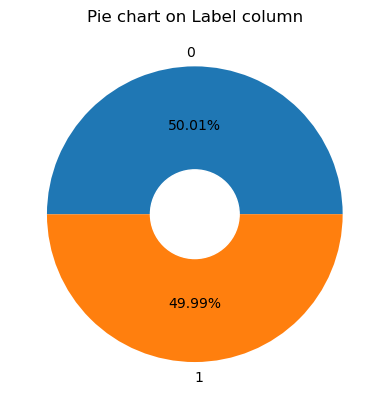

In [9]:
# Visual Representation of Target Variable

plt.pie(df1['label'].value_counts(), labels = df1['label'].value_counts().index,autopct='%.2f%%')
c = plt.Circle((0,0), radius = 0.3, color = 'White')
plt.title('Pie chart on Label column')
plt.gcf() # gcf-get current figure
plt.gca().add_artist(c)   # get current axis
plt.show()


## Data Preprocessing

In [10]:
%%time

corpus = []

stop_words = set(stopwords.words('english'))

for i in range(len(df1)):
    # removing all special characters,number from review column
    review = re.sub('[^a-zA-Z]',' ',df1['review'][i])
    
    # making all review column unifromly to lower character
    review = review.lower()
    
    # splitting all review column sentence to words
    review = review.split()
    
    # extracting words other than stopwords
    review = [word  for word in review if word not in stop_words]
    
    # joining all words to sentence back
    review = ' '.join(review)
  
    # appending all words to corpus
    corpus.append(review)

Wall time: 6.25 s


In [11]:
#after removing stopwords and coverting to dataframe for further useage
df2=pd.concat([pd.Series(corpus),df1['label']],axis=1)
df2.rename(columns={0:'review'},inplace=True)
df2.head()

,review,label
0,great book must preface saying religious loved...,1
1,huge disappointment big time long term trevani...,0
2,wayne tight cant hang turk album hot wants how...,1
3,excellent read book elementary school probably...,1
4,anusara although book touted several anusara w...,0


# Common Words used- Analyse the occurance of words

In [12]:
common_words = pd.Series(' '.join(df2['review']).split()).value_counts()[:50]
common_words

book       27469
one        19284
great      15094
like       14429
good       14381
would      11825
get         9762
read        9750
time        9284
movie       8435
really      7937
well        7722
much        7155
first       7124
even        6948
love        6585
buy         6285
product     6096
cd          5980
use         5860
best        5855
better      5826
work        5618
also        5315
album       5183
could       5105
bought      5103
new         5059
way         4884
little      4826
story       4816
back        4602
many        4570
money       4525
think       4491
never       4455
make        4429
two         4427
music       4400
got         4381
still       4368
know        4137
bad         4116
old         4071
books       4054
ever        4033
made        4014
people      3994
see         3949
want        3869
dtype: int64

# Remove the words that are not required or meaningless

In [13]:
(pd.DataFrame(common_words)).index

Index(['book', 'one', 'great', 'like', 'good', 'would', 'get', 'read', 'time',
       'movie', 'really', 'well', 'much', 'first', 'even', 'love', 'buy',
       'product', 'cd', 'use', 'best', 'better', 'work', 'also', 'album',
       'could', 'bought', 'new', 'way', 'little', 'story', 'back', 'many',
       'money', 'think', 'never', 'make', 'two', 'music', 'got', 'still',
       'know', 'bad', 'old', 'books', 'ever', 'made', 'people', 'see', 'want'],
      dtype='object')

In [14]:
word_removal=['would','get','also','two','got','us','let','yet']

In [15]:
df2['review'] = df2['review'].apply(lambda x: " ".join(x for x in x.split() if x not in word_removal))
df2['review'].head()

0    great book must preface saying religious loved...
1    huge disappointment big time long term trevani...
2    wayne tight cant hang turk album hot wants how...
3    excellent read book elementary school probably...
4    anusara although book touted several anusara w...
Name: review, dtype: object

# Words that are not used frequently

In [16]:
Not_frequent = pd.Series(' '.join(df2['review']).split()).value_counts()[-50:]
Not_frequent

moviewatcher           1
cannes                 1
miseries               1
pregant                1
wnere                  1
poeticism              1
prety                  1
ailean                 1
unsabual               1
reeding                1
docttor                1
duncker                1
photoshoots            1
warbull                1
interdisciplinarity    1
writteni               1
comedienne             1
healy                  1
rukia                  1
rotflmao               1
rhyne                  1
bigand                 1
isbut                  1
dayyou                 1
enumerating            1
despaired              1
atrificial             1
innaccuracies          1
triplehorn             1
unsatified             1
midpoint               1
taffel                 1
yaw                    1
pathethic              1
noway                  1
thunderchild           1
shabbat                1
purposr                1
reticule               1
geoffery               1


# Remove these words

In [17]:
df2['review'] = df2['review'].apply(lambda x: " ".join(x for x in x.split() if x not in Not_frequent))
df2['review'].head()

0    great book must preface saying religious loved...
1    huge disappointment big time long term trevani...
2    wayne tight cant hang turk album hot wants how...
3    excellent read book elementary school probably...
4    anusara although book touted several anusara w...
Name: review, dtype: object

# Lemmatize

In [18]:
wordnet = WordNetLemmatizer()
lem_review=df2['review'].apply(lambda x: " ".join([wordnet.lemmatize(i) for i in x.split()]))

In [19]:
df_lem = pd.DataFrame({'label': df1['label'] , 'review':lem_review })
df_lem.head()

,label,review
0,1,great book must preface saying religious loved...
1,0,huge disappointment big time long term trevani...
2,1,wayne tight cant hang turk album hot want howe...
3,1,excellent read book elementary school probably...
4,0,anusara although book touted several anusara w...


In [1]:
#forming lemmatize cloud words 

positives=df_lem[(df_lem['label']==1)]
p_words = ' '.join(positives['review'])
#p_words

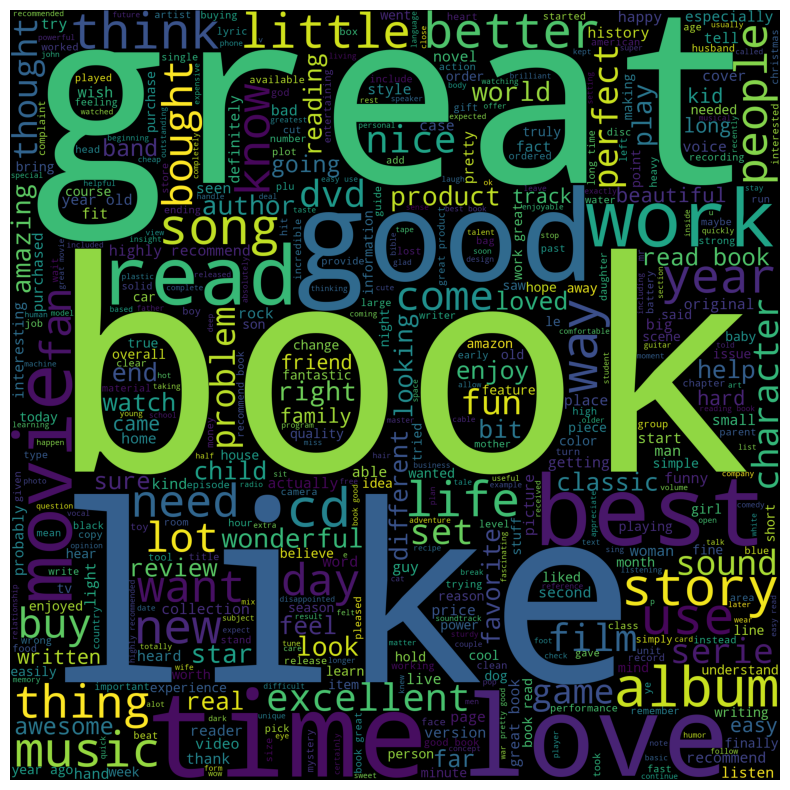

In [21]:
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='Black',
                      width=2000,
                      height=2000,max_words=500
                     ).generate(p_words)

plt.figure(1,figsize=(10, 10))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [2]:
negatives=df_lem[(df_lem['label']==0)]
n_words = ' '.join(negatives['review'])
# n_words

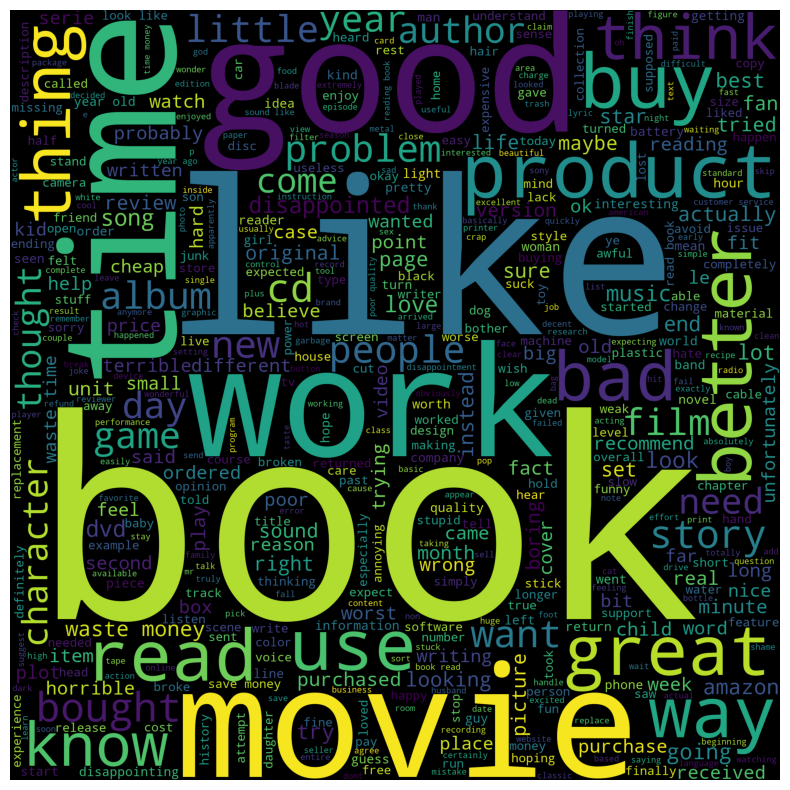

In [23]:
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='Black',
                      width=2000,
                      height=2000,max_words=500
                     ).generate(n_words)

plt.figure(1,figsize=(10, 10))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

## Train and Test split

#### Data set will consist of only Lemmatized data. Name of the data set is df_lem.

In [24]:
# Train test split for Lemmatized data set.

x_lem = df_lem['review']
y_lem = df_lem['label']

xtrain_lem, xtest_lem, ytrain_lem, ytest_lem = train_test_split(x_lem, y_lem, test_size = 0.3, random_state = 42)

## Feature Enginnering

## I planned to do 3 Vectorization techniques:
#### 1. Count Vectorization
#### 2. TF-IDF
#### 3. Word2Vec

In [25]:
%%time
count_vector = CountVectorizer(max_features = 1000, ngram_range=(1,2))
xtrain_lem_cvec = count_vector.fit_transform(xtrain_lem)
count_vector.get_feature_names_out()

Wall time: 11.2 s


array(['able', 'absolutely', 'accurate', 'across', 'acting', 'action',
       'actor', 'actual', 'actually', 'add', 'added', 'addition', 'adult',
       'adventure', 'advertised', 'advice', 'age', 'ago', 'agree', 'air',
       'album', 'almost', 'alone', 'along', 'alot', 'already', 'although',
       'always', 'amazing', 'amazon', 'america', 'american', 'amount',
       'animal', 'annoying', 'another', 'answer', 'anymore', 'anyone',
       'anything', 'anyway', 'apart', 'appreciate', 'area', 'around',
       'arrived', 'art', 'artist', 'ask', 'attempt', 'attention', 'audio',
       'author', 'available', 'average', 'avoid', 'away', 'awesome',
       'awful', 'baby', 'back', 'background', 'bad', 'bag', 'ball',
       'band', 'base', 'based', 'basic', 'basically', 'battery', 'beat',
       'beautiful', 'became', 'become', 'bed', 'begin', 'beginner',
       'beginning', 'behind', 'believe', 'best', 'better', 'beware',
       'beyond', 'bible', 'big', 'bit', 'black', 'blade', 'blue', 'body

In [26]:
xtrain_lem_cvec_df=pd.DataFrame(xtrain_lem_cvec.toarray(),columns=count_vector.get_feature_names_out())
xtrain_lem_cvec_df.head()

,able,absolutely,accurate,across,acting,action,actor,actual,actually,add,...,writer,writing,written,wrong,wrote,year,year ago,year old,yes,young
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [27]:
xtest_lem_cvec = count_vector.transform(xtest_lem)
xtest_lem_cvec_df=pd.DataFrame(xtest_lem_cvec.toarray(),columns=count_vector.get_feature_names_out())
xtest_lem_cvec_df.head()

,able,absolutely,accurate,across,acting,action,actor,actual,actually,add,...,writer,writing,written,wrong,wrote,year,year ago,year old,yes,young
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
tfidf_vector = TfidfVectorizer(max_features = 1000, ngram_range=(1,2))
xtrain_lem_tf = tfidf_vector.fit_transform(xtrain_lem)
xtrain_lem_tf_df=pd.DataFrame(xtrain_lem_tf.toarray(),columns=tfidf_vector.get_feature_names_out())
xtrain_lem_tf_df.head()

,able,absolutely,accurate,across,acting,action,actor,actual,actually,add,...,writer,writing,written,wrong,wrote,year,year ago,year old,yes,young
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00000,0.0,0.0,0.0,0.168345,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.22092,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0


In [29]:
xtest_lem_tf = tfidf_vector.transform(xtest_lem)
xtest_lem_tf_df=pd.DataFrame(xtest_lem_tf.toarray(),columns=tfidf_vector.get_feature_names_out())
xtest_lem_tf_df.head()

,able,absolutely,accurate,across,acting,action,actor,actual,actually,add,...,writer,writing,written,wrong,wrote,year,year ago,year old,yes,young
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.120786,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [30]:
# Creating a data frame for the interpretation with all the models together.
performance_df = pd.DataFrame(columns=['Model_name', 'Accurarcy_train', 'Accuracy_test', 'Precision_score_train',
                                       'Precision_score_test','Recall_train','Recall_test',
                                       'F1score_train','F1Score_test','Remark'])
# a common method for model buidling.
def model_build(model, Name):
    global performance_df

    if ('lstm' in Name.lower() or 'rnn' in Name.lower() ):
        prediction_train = model.predict(xtrain)
        ypred_train=[0 if i<0.5 else 1       for i in prediction_train]
    
        prediction_test = model.predict(xtest)
        ypred_test=[0 if i<0.5 else 1       for i in prediction_test]

        Accurarcy_train       = accuracy_score(ytrain,ypred_train)
        Accuracy_test         = accuracy_score(ytest,ypred_test)
        Precision_score_train = precision_score(ytrain,ypred_train)
        Precision_score_test  = precision_score(ytest,ypred_test)
        Recall_train          = recall_score(ytrain,ypred_train)
        Recall_test           = recall_score(ytest,ypred_test)
    
        F1score_train = f1_score(ytrain,ypred_train)
        F1Score_test  = f1_score(ytest,ypred_test)

    else:
    
        ypred_train  = model.predict(xtrain)
        ypred_test   = model.predict(xtest)
        ytest_prob   = model.predict_proba(xtest)[:,1]
    
        Accurarcy_train       = accuracy_score(ytrain,ypred_train)
        Accuracy_test         = accuracy_score(ytest,ypred_test)
        Precision_score_train = precision_score(ytrain,ypred_train)
        Precision_score_test  = precision_score(ytest,ypred_test)
        Recall_train          = recall_score(ytrain,ypred_train)
        Recall_test           = recall_score(ytest,ypred_test)
    
        F1score_train = f1_score(ytrain,ypred_train)
        F1Score_test  = f1_score(ytest,ypred_test)

    def remark(train_acc,test_acc):
        if abs(train_acc - test_acc) > 0.03 or train_acc > 0.95:
            return 'Over Fit'
        elif train_acc < 0.8 or test_acc < 0.8:
            return 'Under Fit'
        else:
            return 'Good Fit'
    
    performance_df = performance_df.append({'Model_name' : Name, 'Accurarcy_train' : Accurarcy_train,
                                            'Accuracy_test': Accuracy_test, 'Precision_score_train' : Precision_score_train,
                                            'Precision_score_test' : Precision_score_test, 'Recall_train' : Recall_train,
                                            'Recall_test' : Recall_test, 'F1score_train' : F1score_train,
                                            'F1Score_test' : F1Score_test, 'Remark' : remark(Accurarcy_train, Accuracy_test) }, ignore_index=True)

    print('Train Classifcation Report in  {}'.format(Name),'\n',classification_report(ytrain,ypred_train))
    print('***********')
    print('Test Classifcation Report in {} '.format(Name),'\n',classification_report(ytest,ypred_test))

    if ('lstm' in Name.lower() or 'rnn'  in Name.lower() ):
        print('---')
        
    else:
        
        # Visualization of the ROC curve.
        fpr,tpr,thershold=roc_curve(ytest,ytest_prob)
        plt.plot(fpr,tpr)
        plt.plot([0,1],[0,1],'r--')
        plt.xlabel('FPR')
        plt.ylabel('TPR')
        plt.title('ROC-AUC Curve of {}'.format(Name))
        plt.text(x = 0.4, y = 0.3, s = ('ROC_AUC_Score:', round(roc_auc_score(ytest,ypred_test), 4))) 
        plt.show()
    
    # Confusion Matrix for train and test.
    cm = confusion_matrix(ytrain,ypred_train)
    print('Confusion Matrix for Train')
    ConfusionMatrixDisplay(cm).plot()
    plt.grid(False)
    plt.show()

    cm1 = confusion_matrix(ytest,ypred_test)
    print('Confusion Matrix for Test')
    ConfusionMatrixDisplay(cm1).plot()
    plt.grid(False)
    plt.show()

In [31]:
# Assinging these values on behalf of running model_build function with Lemmatized data with Count Vector.

xtrain = xtrain_lem_cvec
xtest  = xtest_lem_cvec
ytrain = ytrain_lem
ytest  = ytest_lem

In [32]:
print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(35000, 1000)
(15000, 1000)
(35000,)
(15000,)


### Building Models for Lemmatized data with Count Vectorizer

Train Classifcation Report in  DecisionTree_LEM_CV 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     17476
           1       1.00      1.00      1.00     17524

    accuracy                           1.00     35000
   macro avg       1.00      1.00      1.00     35000
weighted avg       1.00      1.00      1.00     35000

***********
Test Classifcation Report in DecisionTree_LEM_CV  
               precision    recall  f1-score   support

           0       0.74      0.72      0.73      7531
           1       0.73      0.75      0.74      7469

    accuracy                           0.74     15000
   macro avg       0.74      0.74      0.74     15000
weighted avg       0.74      0.74      0.74     15000



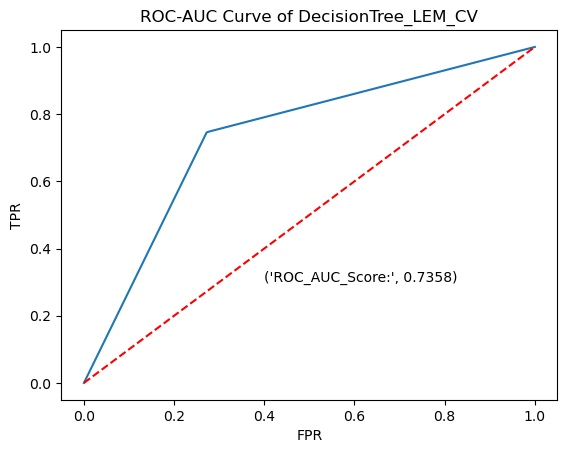

Confusion Matrix for Train


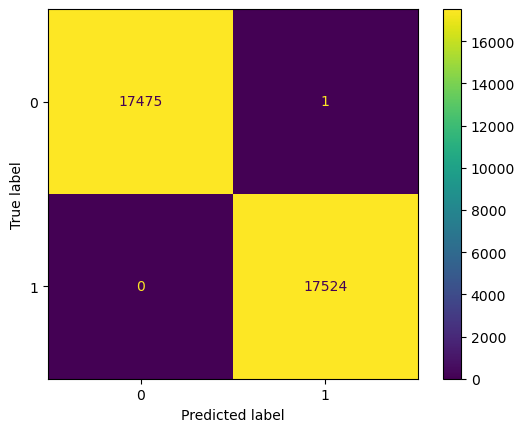

Confusion Matrix for Test


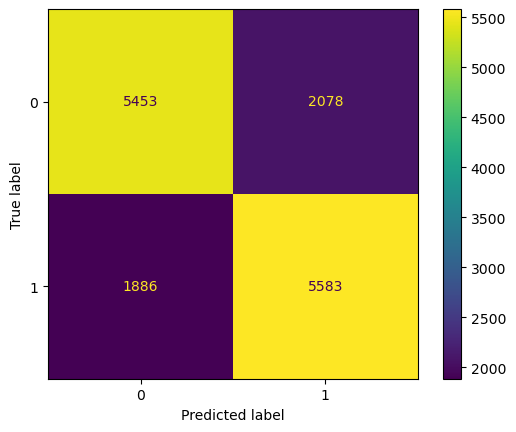

In [33]:
dt = DecisionTreeClassifier()
model_dt = dt.fit(xtrain,ytrain)
model_build(model_dt,'DecisionTree_LEM_CV')

Train Classifcation Report in  RandomForest_LEM_CV 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     17476
           1       1.00      1.00      1.00     17524

    accuracy                           1.00     35000
   macro avg       1.00      1.00      1.00     35000
weighted avg       1.00      1.00      1.00     35000

***********
Test Classifcation Report in RandomForest_LEM_CV  
               precision    recall  f1-score   support

           0       0.84      0.82      0.83      7531
           1       0.83      0.85      0.84      7469

    accuracy                           0.83     15000
   macro avg       0.83      0.83      0.83     15000
weighted avg       0.83      0.83      0.83     15000



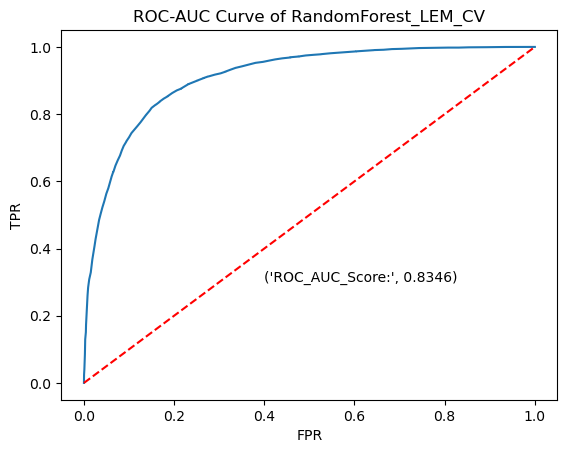

Confusion Matrix for Train


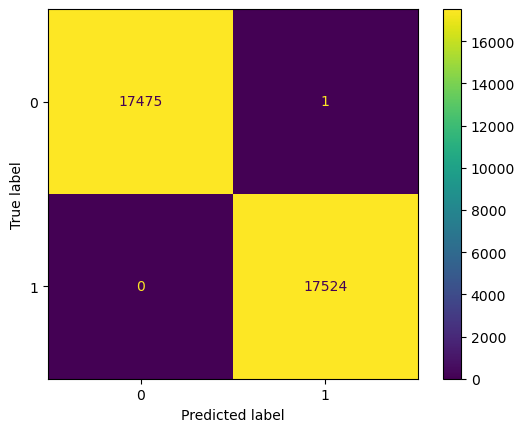

Confusion Matrix for Test


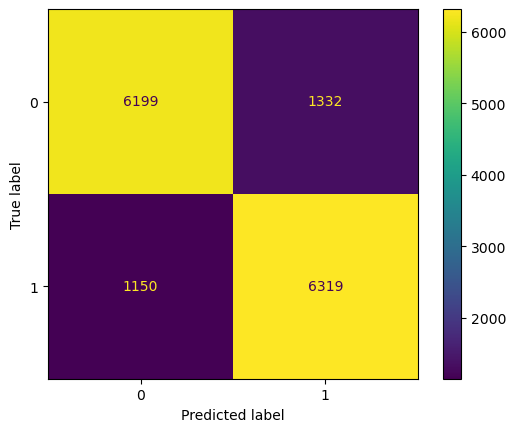

In [34]:
rf = RandomForestClassifier()
model_rf = rf.fit(xtrain,ytrain)
model_build(model_rf,'RandomForest_LEM_CV')

Train Classifcation Report in  MultinomialNB_LEM_CV 
               precision    recall  f1-score   support

           0       0.85      0.81      0.83     17476
           1       0.82      0.85      0.84     17524

    accuracy                           0.83     35000
   macro avg       0.83      0.83      0.83     35000
weighted avg       0.83      0.83      0.83     35000

***********
Test Classifcation Report in MultinomialNB_LEM_CV  
               precision    recall  f1-score   support

           0       0.85      0.81      0.83      7531
           1       0.82      0.85      0.84      7469

    accuracy                           0.83     15000
   macro avg       0.83      0.83      0.83     15000
weighted avg       0.83      0.83      0.83     15000



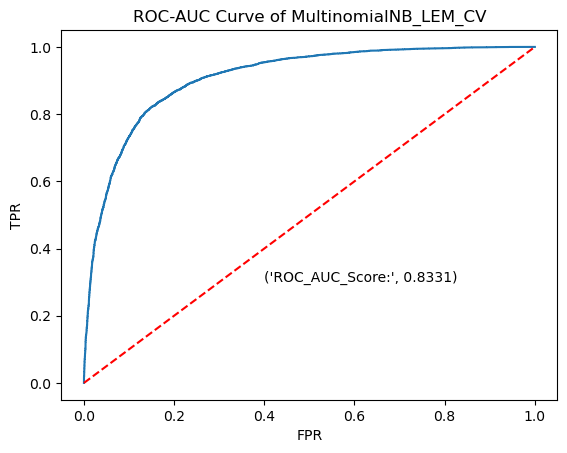

Confusion Matrix for Train


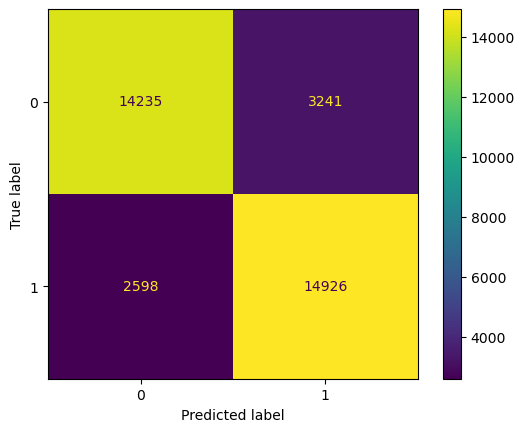

Confusion Matrix for Test


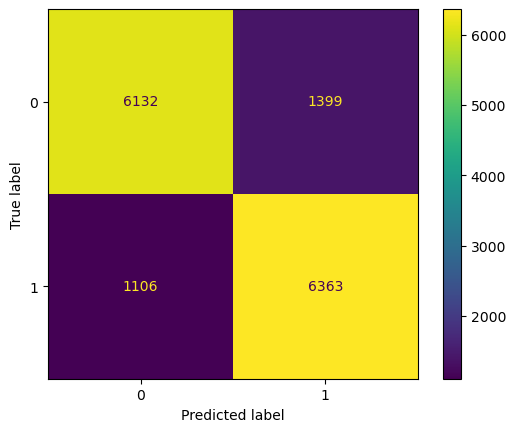

In [35]:
mnb = MultinomialNB()
model_mnb = mnb.fit(xtrain, ytrain)
model_build(model_mnb,'MultinomialNB_LEM_CV')

Train Classifcation Report in  AdaBoost_LEM_CV 
               precision    recall  f1-score   support

           0       0.78      0.83      0.80     17476
           1       0.82      0.76      0.79     17524

    accuracy                           0.80     35000
   macro avg       0.80      0.80      0.80     35000
weighted avg       0.80      0.80      0.80     35000

***********
Test Classifcation Report in AdaBoost_LEM_CV  
               precision    recall  f1-score   support

           0       0.78      0.83      0.81      7531
           1       0.82      0.77      0.79      7469

    accuracy                           0.80     15000
   macro avg       0.80      0.80      0.80     15000
weighted avg       0.80      0.80      0.80     15000



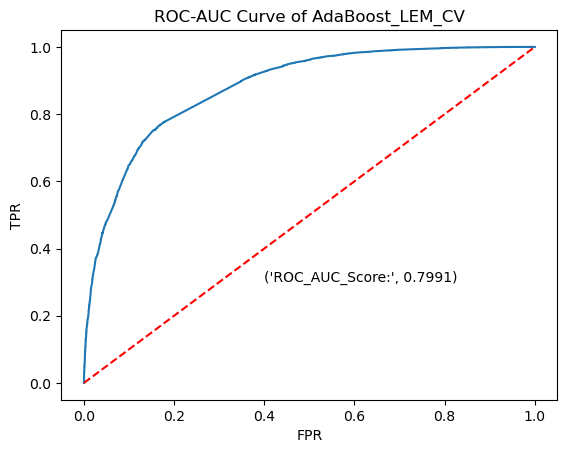

Confusion Matrix for Train


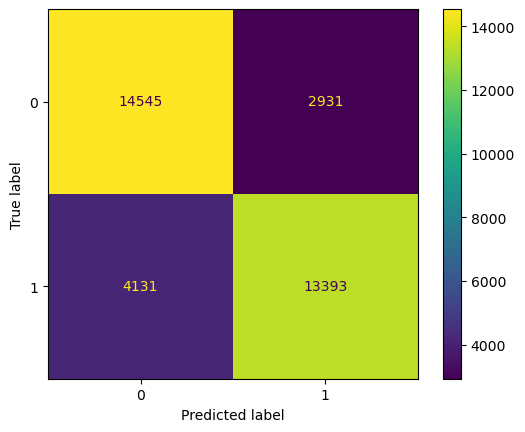

Confusion Matrix for Test


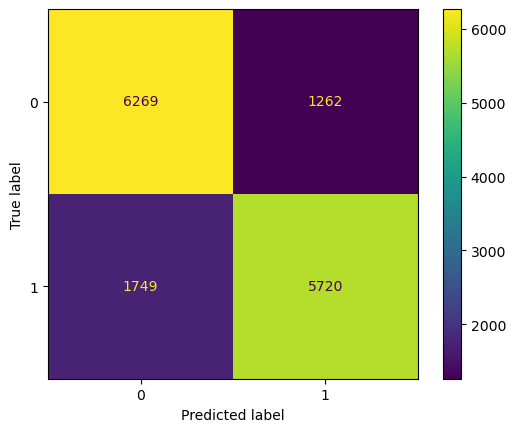

In [36]:
ada = AdaBoostClassifier()
model_ada = ada.fit(xtrain,ytrain)
model_build(model_ada,'AdaBoost_LEM_CV')

Train Classifcation Report in  GradientBoosting_LEM_CV 
               precision    recall  f1-score   support

           0       0.78      0.84      0.81     17476
           1       0.83      0.76      0.79     17524

    accuracy                           0.80     35000
   macro avg       0.80      0.80      0.80     35000
weighted avg       0.80      0.80      0.80     35000

***********
Test Classifcation Report in GradientBoosting_LEM_CV  
               precision    recall  f1-score   support

           0       0.77      0.84      0.80      7531
           1       0.82      0.75      0.78      7469

    accuracy                           0.79     15000
   macro avg       0.79      0.79      0.79     15000
weighted avg       0.79      0.79      0.79     15000



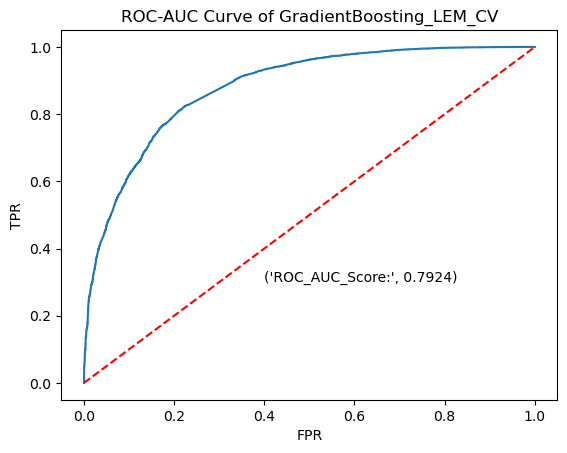

Confusion Matrix for Train


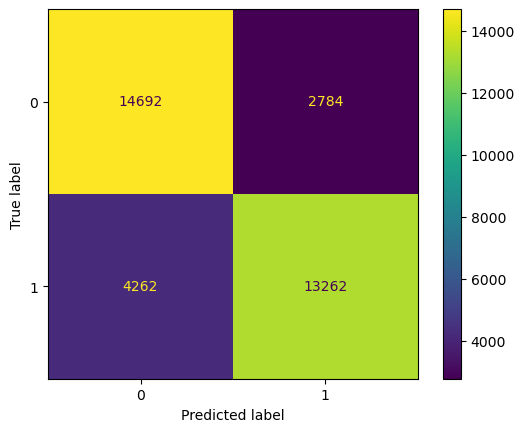

Confusion Matrix for Test


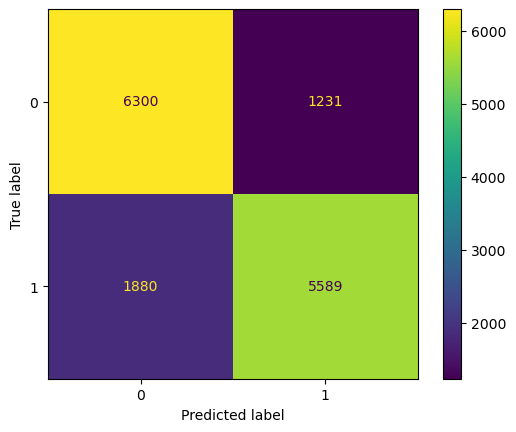

In [37]:
gbc = GradientBoostingClassifier()
model_gbc = gbc.fit(xtrain,ytrain)
model_build(model_gbc,'GradientBoosting_LEM_CV')

Train Classifcation Report in  XGBClassifier_LEM_CV 
               precision    recall  f1-score   support

           0       0.89      0.89      0.89     17476
           1       0.89      0.89      0.89     17524

    accuracy                           0.89     35000
   macro avg       0.89      0.89      0.89     35000
weighted avg       0.89      0.89      0.89     35000

***********
Test Classifcation Report in XGBClassifier_LEM_CV  
               precision    recall  f1-score   support

           0       0.84      0.84      0.84      7531
           1       0.84      0.84      0.84      7469

    accuracy                           0.84     15000
   macro avg       0.84      0.84      0.84     15000
weighted avg       0.84      0.84      0.84     15000



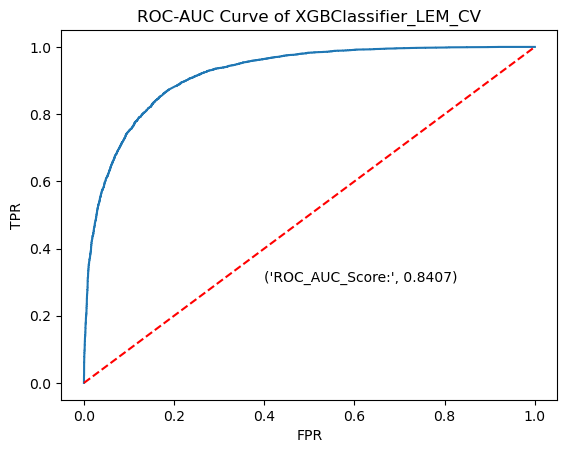

Confusion Matrix for Train


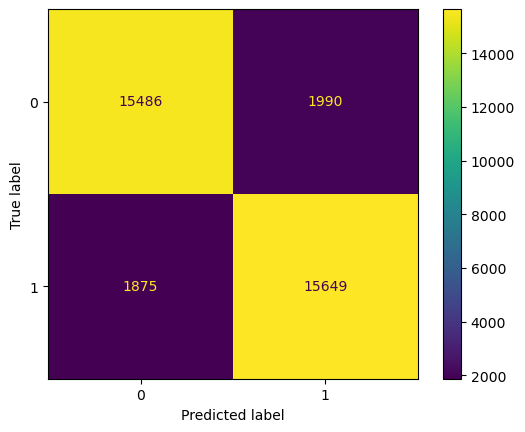

Confusion Matrix for Test


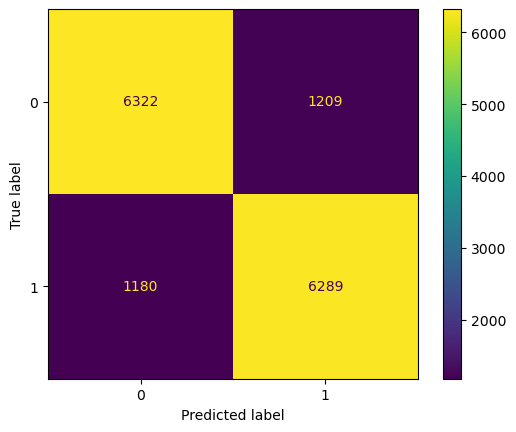

In [38]:
xgb = XGBClassifier()
model_xgb = xgb.fit(xtrain,ytrain)
model_build(model_xgb,'XGBClassifier_LEM_CV')

In [39]:
# Hyper Parameter tuning for the MultinomialNB for Lemmatized data with Count Vector since it came in the top 3 model.

from  sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV

mnb=MultinomialNB()

params = {'alpha': [0.1, 0.5, 1.0, 1.5, 2.0,3,5,10], 'fit_prior':[True,False]}

gsv_cv= GridSearchCV(estimator=mnb, param_grid=params,cv=5,scoring='accuracy')

model_gsv_cv=gsv_cv.fit(xtrain,ytrain)
model_gsv_cv.best_estimator_

MultinomialNB(alpha=0.5)

Train Classifcation Report in  GSV_MNB_LEM_CV 
               precision    recall  f1-score   support

           0       0.85      0.81      0.83     17476
           1       0.82      0.85      0.84     17524

    accuracy                           0.83     35000
   macro avg       0.83      0.83      0.83     35000
weighted avg       0.83      0.83      0.83     35000

***********
Test Classifcation Report in GSV_MNB_LEM_CV  
               precision    recall  f1-score   support

           0       0.85      0.81      0.83      7531
           1       0.82      0.85      0.84      7469

    accuracy                           0.83     15000
   macro avg       0.83      0.83      0.83     15000
weighted avg       0.83      0.83      0.83     15000



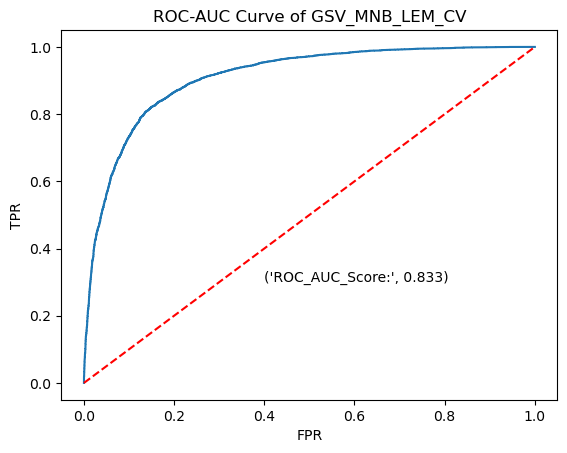

Confusion Matrix for Train


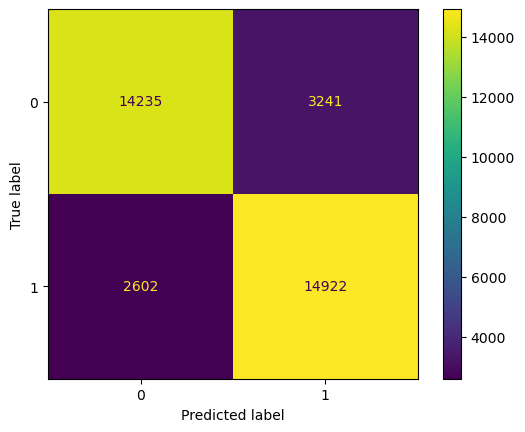

Confusion Matrix for Test


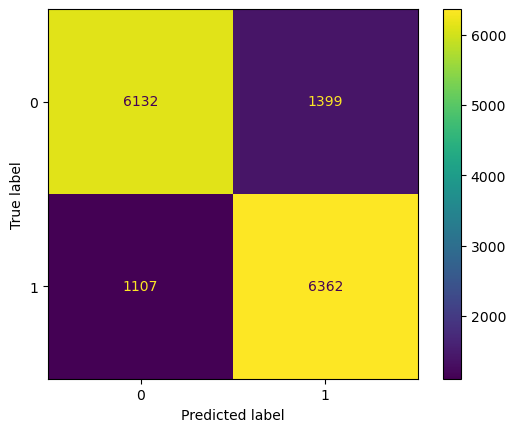

In [40]:
model_build(model_gsv_cv.best_estimator_,'GSV_MNB_LEM_CV')

In [41]:
# #CV_RNN MODEL

# # Pad sequences for RNN model
# xtrain = pad_sequences(np.array(xtrain_lem_cvec_df ), padding='post')
# xtest= pad_sequences(np.array(xtest_lem_cvec_df), padding='post')

# # Convert labels to numpy array
# ytrain= np.array(ytrain_lem)
# ytest = np.array(ytest_lem)

# # Model Definition
# model_lem_cv_rnn = Sequential()
# model_lem_cv_rnn.add(Embedding(input_dim=xtrain.shape[0], output_dim=100, input_length=xtrain.shape[1]))
# model_lem_cv_rnn.add(SimpleRNN(128))
# model_lem_cv_rnn.add(Dense(1, activation='sigmoid'))

# # Compile and train the model
# model_lem_cv_rnn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# model_lem_cv_rnn.fit(xtrain , ytrain, epochs=2, batch_size=32, verbose=1)

In [42]:
# model_build(model_lem_cv_rnn,'RNN_LEM_CV')

In [43]:
# #CV _LSTM MODEL

# # Pad sequences for RNN model
# xtrain = pad_sequences(np.array(xtrain_lem_cvec_df ), padding='post')
# xtest= pad_sequences(np.array(xtest_lem_cvec_df), padding='post')

# # Convertlabels to numpy array
# ytrain = np.array(ytrain_lem)
# ytest= np.array(ytest_lem)

# # Model Definition
# model_lem_cv_lstm = Sequential()
# model_lem_cv_lstm.add(Embedding(input_dim=xtrain.shape[0], output_dim=100, input_length=xtrain.shape[1]))
# model_lem_cv_lstm.add(LSTM(128))
# model_lem_cv_lstm.add(Dense(1, activation='sigmoid'))

# # Compile and train the model
# model_lem_cv_lstm.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# model_lem_cv_lstm.fit(xtrain , ytrain, epochs=1, batch_size=32, verbose=1)

In [44]:
# model_build(model_lem_cv_lstm,'LSTM_LEM_CV')

# LEM_TF-IDF

In [45]:
# Assinging these values on behalf of running model_build function with Lemmatized data with TF-IDF.

xtrain = xtrain_lem_tf
xtest  = xtest_lem_tf
ytrain = ytrain_lem
ytest  = ytest_lem

In [46]:
print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(35000, 1000)
(15000, 1000)
(35000,)
(15000,)


### Building Models for Lemmatized data with TF-IDF

Train Classifcation Report in  DecisionTree_LEM_TFIDF 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     17476
           1       1.00      1.00      1.00     17524

    accuracy                           1.00     35000
   macro avg       1.00      1.00      1.00     35000
weighted avg       1.00      1.00      1.00     35000

***********
Test Classifcation Report in DecisionTree_LEM_TFIDF  
               precision    recall  f1-score   support

           0       0.74      0.73      0.73      7531
           1       0.73      0.74      0.73      7469

    accuracy                           0.73     15000
   macro avg       0.73      0.73      0.73     15000
weighted avg       0.73      0.73      0.73     15000



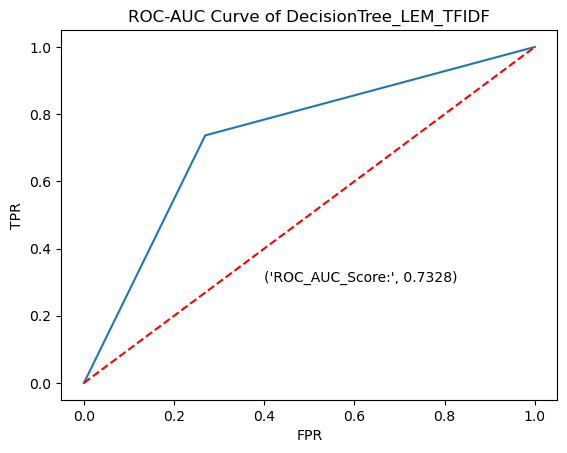

Confusion Matrix for Train


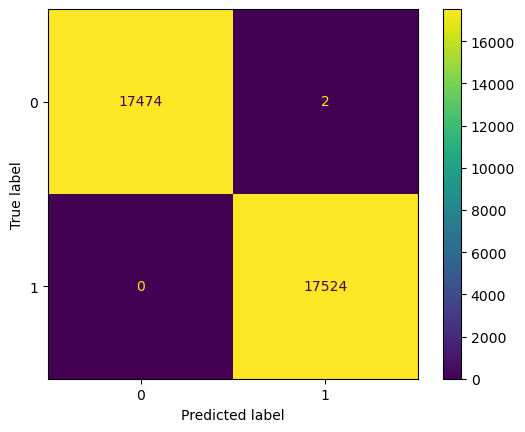

Confusion Matrix for Test


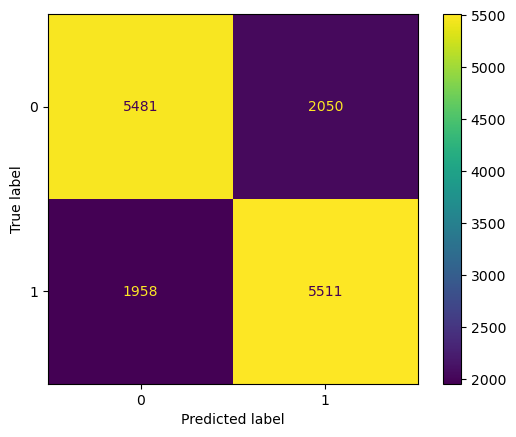

In [47]:
dt = DecisionTreeClassifier()
model_dt = dt.fit(xtrain,ytrain)
model_build(model_dt,'DecisionTree_LEM_TFIDF')

Train Classifcation Report in  RandomForest_LEM_TFIDF 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     17476
           1       1.00      1.00      1.00     17524

    accuracy                           1.00     35000
   macro avg       1.00      1.00      1.00     35000
weighted avg       1.00      1.00      1.00     35000

***********
Test Classifcation Report in RandomForest_LEM_TFIDF  
               precision    recall  f1-score   support

           0       0.84      0.82      0.83      7531
           1       0.83      0.85      0.84      7469

    accuracy                           0.83     15000
   macro avg       0.83      0.83      0.83     15000
weighted avg       0.84      0.83      0.83     15000



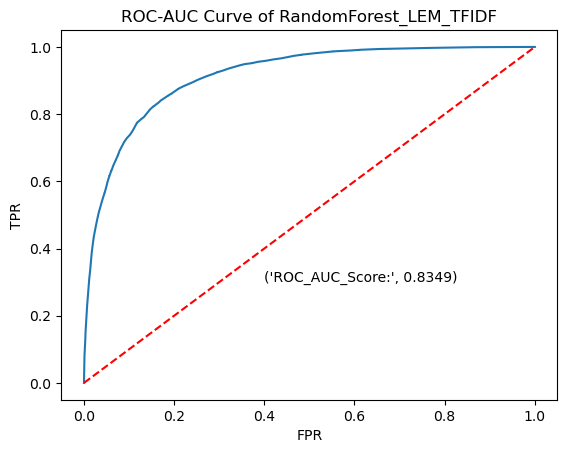

Confusion Matrix for Train


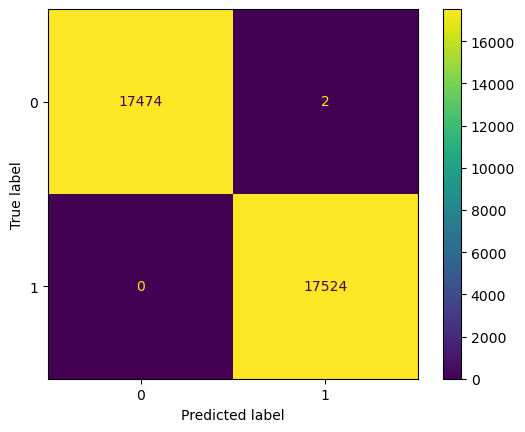

Confusion Matrix for Test


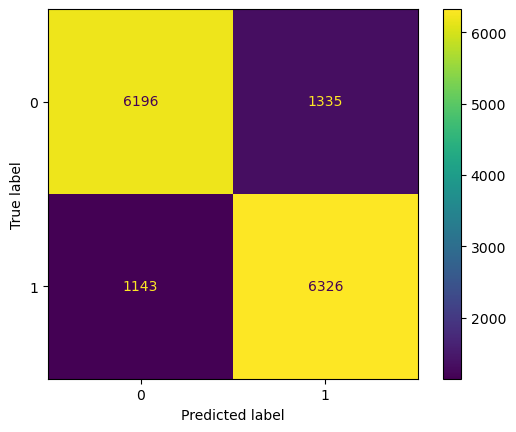

In [48]:
rf = RandomForestClassifier()
model_rf = rf.fit(xtrain,ytrain)
model_build(model_rf,'RandomForest_LEM_TFIDF')

Train Classifcation Report in  MultinomialNB_LEM_TFIDF 
               precision    recall  f1-score   support

           0       0.84      0.82      0.83     17476
           1       0.82      0.85      0.84     17524

    accuracy                           0.83     35000
   macro avg       0.83      0.83      0.83     35000
weighted avg       0.83      0.83      0.83     35000

***********
Test Classifcation Report in MultinomialNB_LEM_TFIDF  
               precision    recall  f1-score   support

           0       0.85      0.82      0.83      7531
           1       0.83      0.85      0.84      7469

    accuracy                           0.84     15000
   macro avg       0.84      0.84      0.84     15000
weighted avg       0.84      0.84      0.84     15000



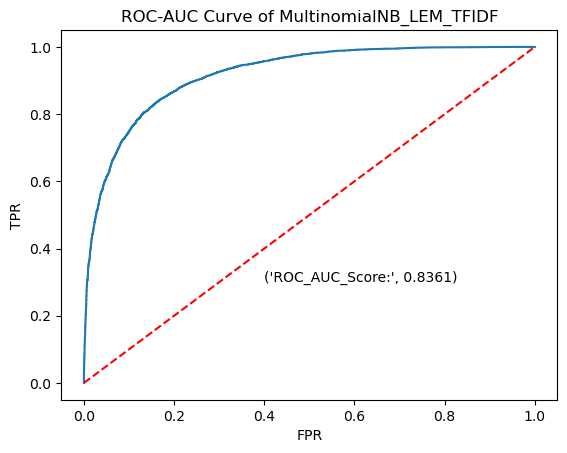

Confusion Matrix for Train


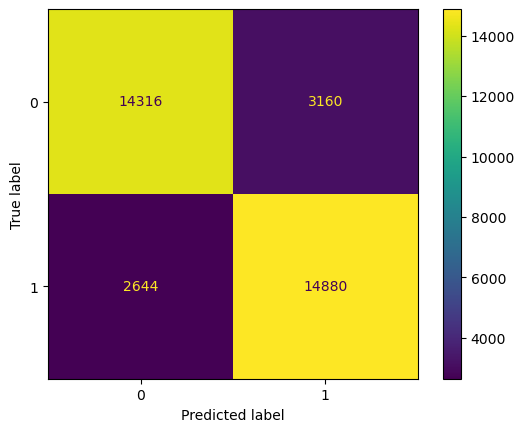

Confusion Matrix for Test


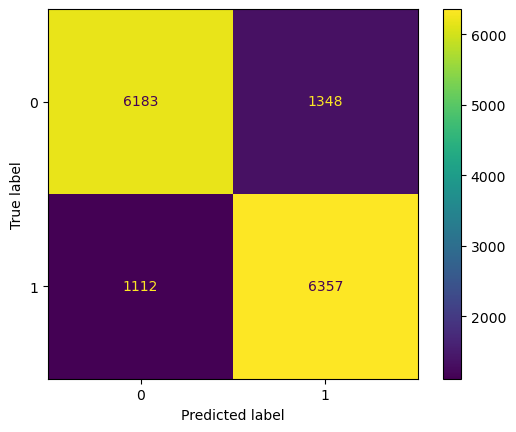

In [49]:
mnb = MultinomialNB()
model_mnb = mnb.fit(xtrain, ytrain)
model_build(model_mnb,'MultinomialNB_LEM_TFIDF')

Train Classifcation Report in  AdaBoost_LEM_TFIDF 
               precision    recall  f1-score   support

           0       0.80      0.82      0.81     17476
           1       0.81      0.79      0.80     17524

    accuracy                           0.80     35000
   macro avg       0.80      0.80      0.80     35000
weighted avg       0.80      0.80      0.80     35000

***********
Test Classifcation Report in AdaBoost_LEM_TFIDF  
               precision    recall  f1-score   support

           0       0.80      0.82      0.81      7531
           1       0.81      0.79      0.80      7469

    accuracy                           0.80     15000
   macro avg       0.80      0.80      0.80     15000
weighted avg       0.80      0.80      0.80     15000



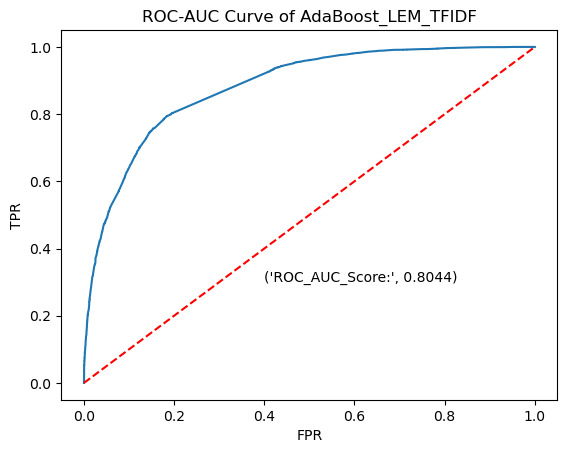

Confusion Matrix for Train


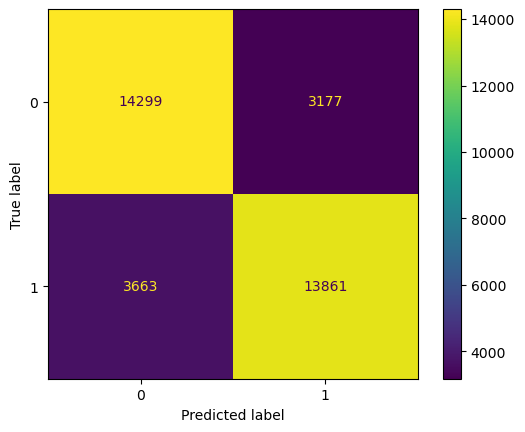

Confusion Matrix for Test


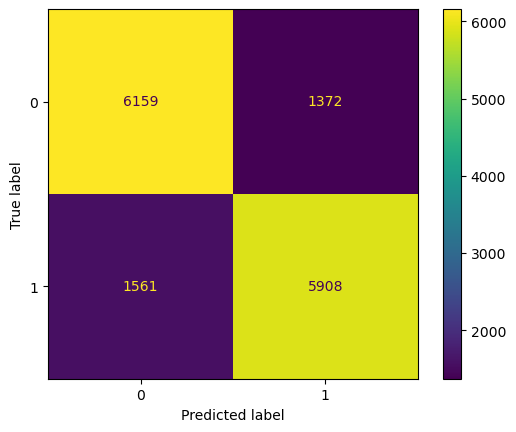

In [50]:
ada = AdaBoostClassifier()
model_ada = ada.fit(xtrain,ytrain)
model_build(model_ada,'AdaBoost_LEM_TFIDF')

Train Classifcation Report in  GradientBoosting_LEM_TFIDF 
               precision    recall  f1-score   support

           0       0.78      0.84      0.81     17476
           1       0.83      0.77      0.80     17524

    accuracy                           0.81     35000
   macro avg       0.81      0.81      0.80     35000
weighted avg       0.81      0.81      0.80     35000

***********
Test Classifcation Report in GradientBoosting_LEM_TFIDF  
               precision    recall  f1-score   support

           0       0.78      0.83      0.80      7531
           1       0.82      0.76      0.79      7469

    accuracy                           0.80     15000
   macro avg       0.80      0.80      0.80     15000
weighted avg       0.80      0.80      0.80     15000



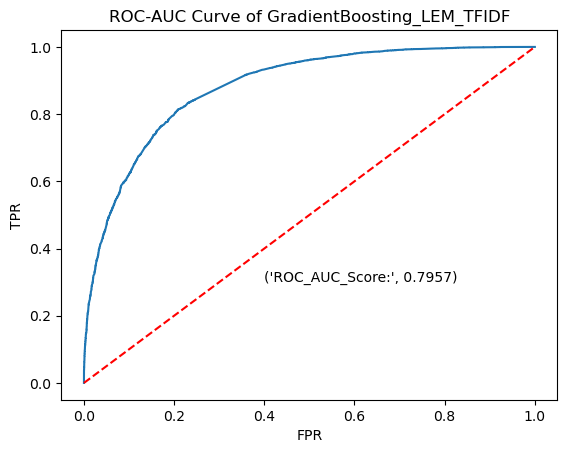

Confusion Matrix for Train


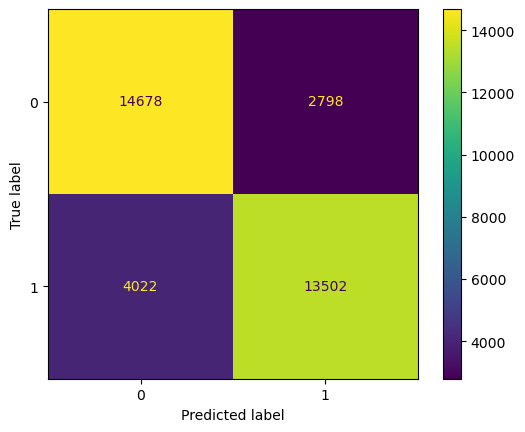

Confusion Matrix for Test


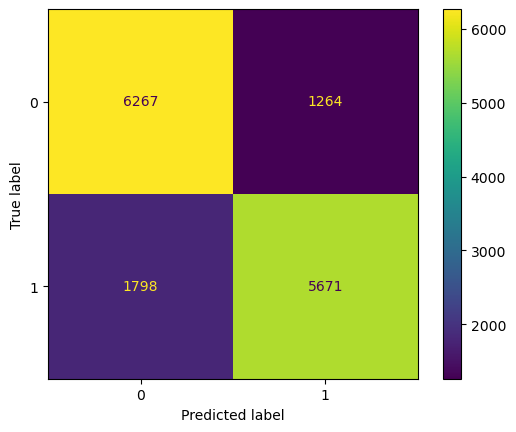

In [51]:
gbc = GradientBoostingClassifier()
model_gbc = gbc.fit(xtrain,ytrain)
model_build(model_gbc,'GradientBoosting_LEM_TFIDF')

Train Classifcation Report in  XGBClassifier_Lemmatized_TFIDF 
               precision    recall  f1-score   support

           0       0.90      0.90      0.90     17476
           1       0.90      0.90      0.90     17524

    accuracy                           0.90     35000
   macro avg       0.90      0.90      0.90     35000
weighted avg       0.90      0.90      0.90     35000

***********
Test Classifcation Report in XGBClassifier_Lemmatized_TFIDF  
               precision    recall  f1-score   support

           0       0.84      0.84      0.84      7531
           1       0.84      0.84      0.84      7469

    accuracy                           0.84     15000
   macro avg       0.84      0.84      0.84     15000
weighted avg       0.84      0.84      0.84     15000



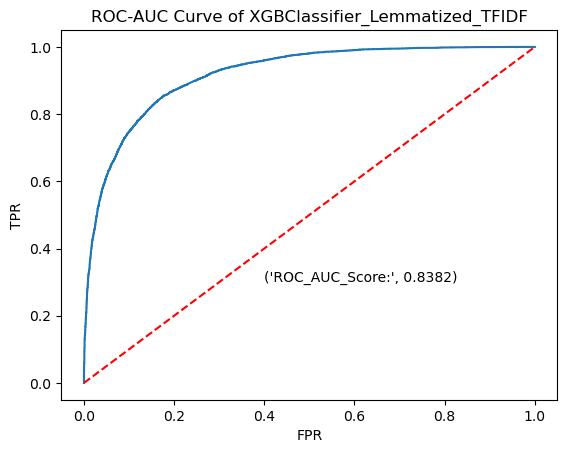

Confusion Matrix for Train


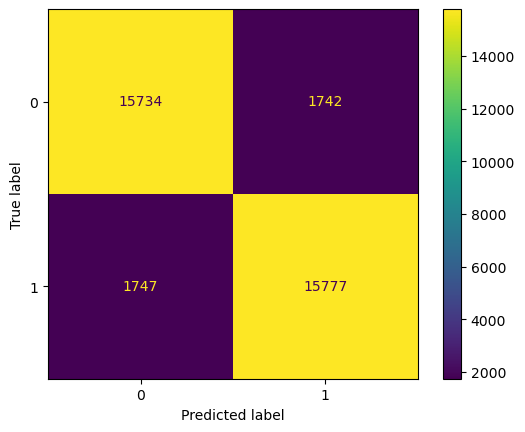

Confusion Matrix for Test


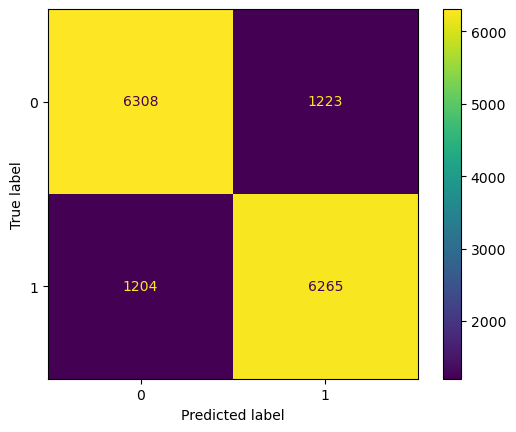

In [52]:
xgb = XGBClassifier()
model_xgb = xgb.fit(xtrain,ytrain)
model_build(model_xgb,'XGBClassifier_Lemmatized_TFIDF')

In [53]:
# Hyper parameter tuning for the MultinomialNB for Lemmatized data with TF-IDF since it is in the top 3 model.

from  sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV

mnb=MultinomialNB()

params = {'alpha': [0.1, 0.5, 1.0, 1.5, 2,3,5,10], 'fit_prior':[True,False]}

gsv_1= GridSearchCV(estimator=mnb, param_grid=params,cv=5,scoring='accuracy')

model_gsv_mnb_tfidf=gsv_1.fit(xtrain,ytrain)
model_gsv_mnb_tfidf.best_estimator_

MultinomialNB(fit_prior=False)

Train Classifcation Report in  GSV_MNB_LEM_TFIDF 
               precision    recall  f1-score   support

           0       0.84      0.82      0.83     17476
           1       0.83      0.85      0.84     17524

    accuracy                           0.83     35000
   macro avg       0.83      0.83      0.83     35000
weighted avg       0.83      0.83      0.83     35000

***********
Test Classifcation Report in GSV_MNB_LEM_TFIDF  
               precision    recall  f1-score   support

           0       0.85      0.82      0.83      7531
           1       0.83      0.85      0.84      7469

    accuracy                           0.84     15000
   macro avg       0.84      0.84      0.84     15000
weighted avg       0.84      0.84      0.84     15000



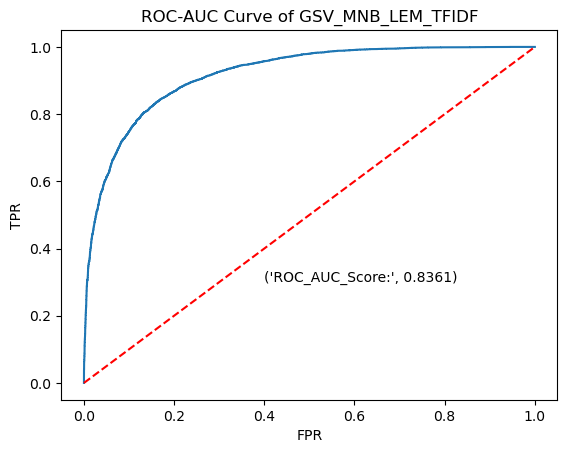

Confusion Matrix for Train


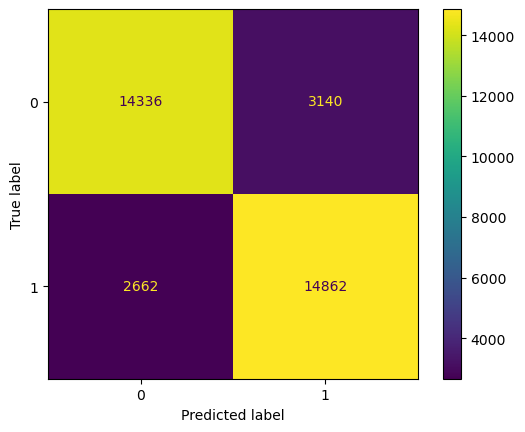

Confusion Matrix for Test


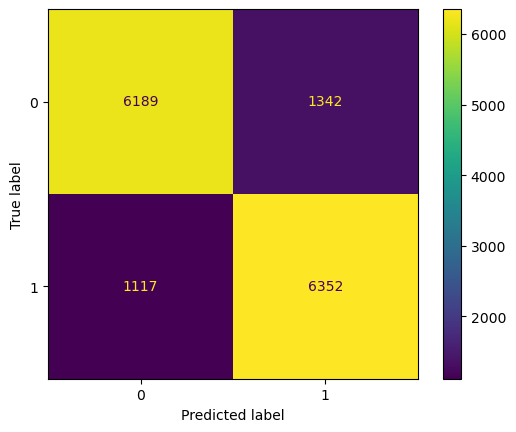

In [54]:
model_build(model_gsv_mnb_tfidf.best_estimator_,'GSV_MNB_LEM_TFIDF')

In [55]:
# Hyper parameter tuning for the AdaBoostClassifier with Lemmatized data with TF-IDF since it came in the top 3 model.

from sklearn.ensemble import AdaBoostClassifier
ada=AdaBoostClassifier()

params= { 'n_estimators': [100, 200,300,500,750,1000],
        'learning_rate': [0.5,1,2]}
gsv_ada_tfidf= GridSearchCV(estimator=ada,param_grid=params,cv=5)

In [56]:
model_gsv_ada_tfidf=gsv_ada_tfidf.fit(xtrain,ytrain)
model_gsv_ada_tfidf.best_estimator_

AdaBoostClassifier(learning_rate=0.5, n_estimators=750)

Train Classifcation Report in  GSV_ADA_LEM_TFIDF 
               precision    recall  f1-score   support

           0       0.87      0.87      0.87     17476
           1       0.87      0.87      0.87     17524

    accuracy                           0.87     35000
   macro avg       0.87      0.87      0.87     35000
weighted avg       0.87      0.87      0.87     35000

***********
Test Classifcation Report in GSV_ADA_LEM_TFIDF  
               precision    recall  f1-score   support

           0       0.85      0.84      0.85      7531
           1       0.84      0.85      0.85      7469

    accuracy                           0.85     15000
   macro avg       0.85      0.85      0.85     15000
weighted avg       0.85      0.85      0.85     15000



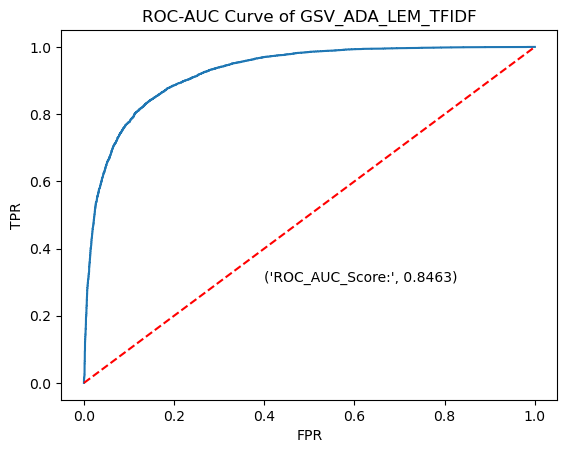

Confusion Matrix for Train


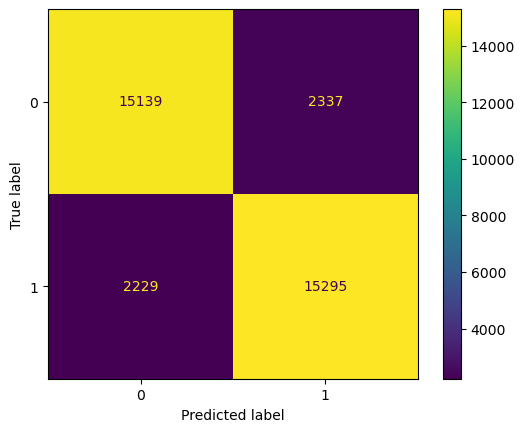

Confusion Matrix for Test


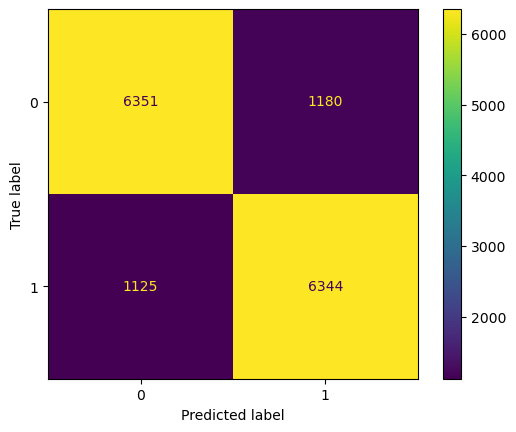

In [57]:
model_build(model_gsv_ada_tfidf.best_estimator_,'GSV_ADA_LEM_TFIDF')

# Stacking

In [58]:
# Performing Stacking using AdaBoostClassifier and MultinomialNB.

from sklearn.ensemble import StackingClassifier
base_learners = [('ada1', AdaBoostClassifier(learning_rate=model_gsv_ada_tfidf.best_params_['learning_rate'], 
                                             n_estimators=model_gsv_ada_tfidf.best_params_['n_estimators']))]

final_learner = MultinomialNB(alpha=model_gsv_mnb_tfidf.best_params_['alpha'],fit_prior=model_gsv_mnb_tfidf.best_params_['fit_prior'])

stacking_clf = StackingClassifier(estimators=base_learners, final_estimator=final_learner)

# Train the stacking classifier
model_stack_ada_mnb=stacking_clf.fit(xtrain, ytrain)

Train Classifcation Report in  ADA_MNB_LEM_TFIDF 
               precision    recall  f1-score   support

           0       0.50      1.00      0.67     17476
           1       0.00      0.00      0.00     17524

    accuracy                           0.50     35000
   macro avg       0.25      0.50      0.33     35000
weighted avg       0.25      0.50      0.33     35000

***********
Test Classifcation Report in ADA_MNB_LEM_TFIDF  
               precision    recall  f1-score   support

           0       0.50      1.00      0.67      7531
           1       0.00      0.00      0.00      7469

    accuracy                           0.50     15000
   macro avg       0.25      0.50      0.33     15000
weighted avg       0.25      0.50      0.34     15000



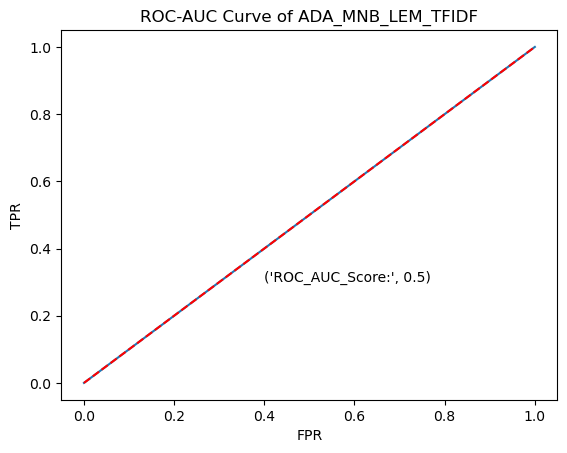

Confusion Matrix for Train


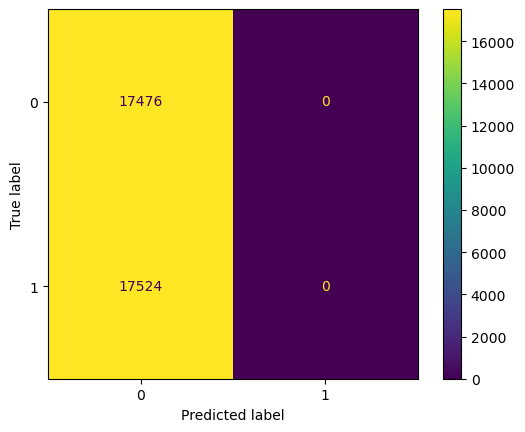

Confusion Matrix for Test


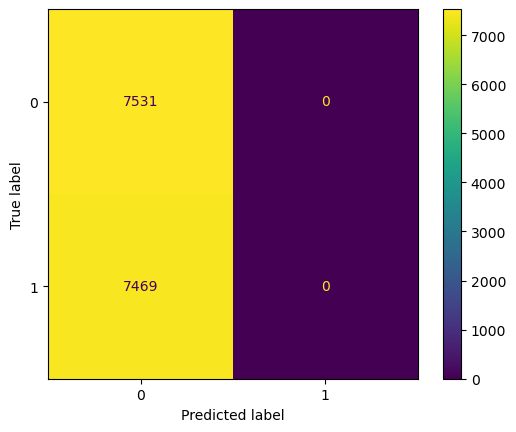

In [59]:
model_build(model_stack_ada_mnb,'ADA_MNB_LEM_TFIDF')

In [60]:
# Performing Stacking using AdaBoostClassifier and MultinomialNB.

from sklearn.ensemble import StackingClassifier

base_learners = [('mnb',MultinomialNB(alpha=model_gsv_mnb_tfidf.best_params_['alpha'],
                                      fit_prior=model_gsv_mnb_tfidf.best_params_['fit_prior']))]

final_learner = AdaBoostClassifier(learning_rate=model_gsv_ada_tfidf.best_params_['learning_rate'], 
                                             n_estimators=model_gsv_ada_tfidf.best_params_['n_estimators'])

stacking_clf = StackingClassifier(estimators=base_learners, final_estimator=final_learner)

# Train the stacking classifier
model_stack_mnb_ada=stacking_clf.fit(xtrain, ytrain)

Train Classifcation Report in  STACK_MNB_ADA_LEM_TFIDF 
               precision    recall  f1-score   support

           0       0.83      0.84      0.84     17476
           1       0.84      0.83      0.83     17524

    accuracy                           0.83     35000
   macro avg       0.83      0.83      0.83     35000
weighted avg       0.83      0.83      0.83     35000

***********
Test Classifcation Report in STACK_MNB_ADA_LEM_TFIDF  
               precision    recall  f1-score   support

           0       0.83      0.84      0.84      7531
           1       0.84      0.83      0.83      7469

    accuracy                           0.84     15000
   macro avg       0.84      0.84      0.84     15000
weighted avg       0.84      0.84      0.84     15000



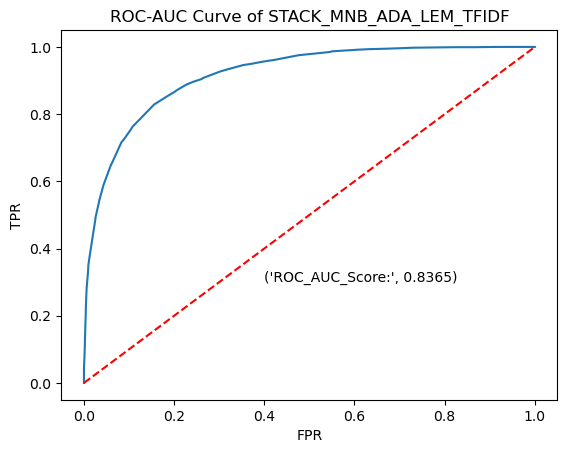

Confusion Matrix for Train


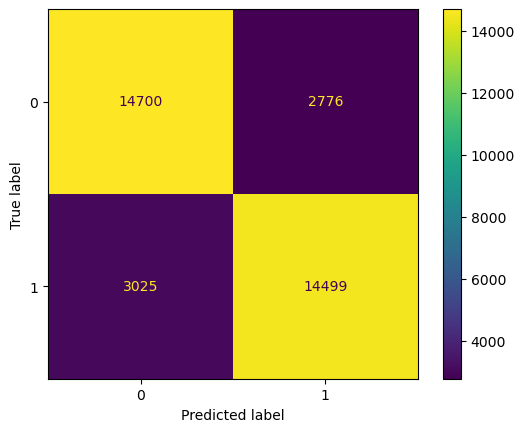

Confusion Matrix for Test


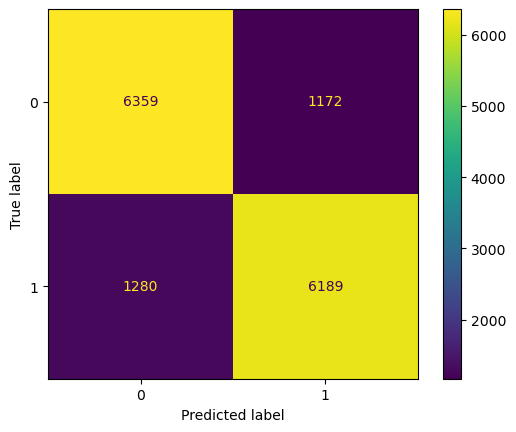

In [61]:
model_build(model_stack_mnb_ada,'STACK_MNB_ADA_LEM_TFIDF')

In [62]:
# #TFIDF _RNN MODEL

# # Pad sequences for RNN model
# xtrain = pad_sequences(np.array(xtrain_lem_tf_df), padding='post')
# xtest= pad_sequences(np.array(xtest_lem_tf_df), padding='post')

# # Convert labels to numpy array
# ytrain = np.array(ytrain_lem)
# ytest = np.array(ytest_lem)

# # Model Definition
# model_lem_tfidf_rnn = Sequential()
# model_lem_tfidf_rnn.add(Embedding(input_dim=xtrain.shape[0], output_dim=100, input_length=xtrain.shape[1]))
# model_lem_tfidf_rnn.add(SimpleRNN(128))
# model_lem_tfidf_rnn.add(Dense(1, activation='sigmoid'))

# # Compile and train the model
# model_lem_tfidf_rnn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# model_lem_tfidf_rnn.fit(xtrain, ytrain, epochs=2, batch_size=32, verbose=1)

In [63]:
# model_build(model_lem_tfidf_rnn,'RNN_LEM_TFIDF')

In [64]:
# # Pad sequences for RNN model
# xtrain = pad_sequences(np.array(xtrain_lem_tf_df), padding='post')
# xtest= pad_sequences(np.array(xtest_lem_tf_df), padding='post')

# # Convert labels to numpy array
# ytrain = np.array(ytrain_lem)
# ytest = np.array(ytest_lem)

# # Model Definition
# model_lem_tfidf_lstm = Sequential()
# model_lem_tfidf_lstm.add(Embedding(input_dim=xtrain.shape[0], output_dim=100, input_length=xtrain.shape[1]))
# model_lem_tfidf_lstm.add(LSTM(128))
# model_lem_tfidf_lstm.add(Dense(1, activation='sigmoid'))

# # Compile and train the model
# model_lem_tfidf_lstm.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# model_lem_tfidf_lstm.fit(xtrain, ytrain, epochs=1, batch_size=32, verbose=1)

In [97]:
# model_build(model_lem_tfidf_lstm,'LSTM_LEM_TFIDF')

# Word2vec building

In [22]:
x_lem = df_lem['review']
y_lem = df_lem['label']

In [23]:
xtrain,xtest,ytrain,ytest=train_test_split(x_lem,y_lem,test_size=0.3,random_state=42)

In [24]:
xtrain

38094    like rumpole like felix book joy yiddish leo r...
40624    underated female vocalist jennifer warnes unus...
49425    atan eller warnke eller several year since inv...
35734    trick trade teacher read great idea even seaso...
41708    one want reread suggest go ahead buy one want ...
                               ...                        
11284    save money purchased knife twice first last ti...
44732    beautiful useful glad ordered hard copy much u...
38158    nicely done well supertones growin nicely thou...
860      wasting thought book title suggests happen sti...
15795    review artist special dvd recently received ar...
Name: review, Length: 35000, dtype: object

In [25]:
#Spliting all words in each row
l1=[]
for i in xtrain:
    l1.append(i.split(" "))
    
#counting the words in each row   
c=[]
for j in l1:
    c.append(len(j))

max_words_count=max(c)

In [29]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(xtrain)

In [31]:
# Step 2: Tokenization
tokenizer = Tokenizer()
tokenizer.fit_on_texts(x_lem)
word_index = tokenizer.word_index
vocab_size = len(word_index) + 1

# Step 3: Encoding Text
encoded_sequences = tokenizer.texts_to_sequences(x_lem)

# Step 4: Padding Sequences
max_sequence_length = max_words_count
padded_sequences = pad_sequences(encoded_sequences, maxlen=max_sequence_length)

In [32]:
# Step 5: Splitting into Training and Testing Sets
labels = y_lem
# labels = to_categorical(labels)  # One-hot encode labels
# labels = np.array(labels)
xtrain, xtest, ytrain, ytest = train_test_split(padded_sequences, labels, test_size=0.2, random_state=42)

# Step 6: Pre-training Word2Vec Model
word2vec_model = Word2Vec(sentences=x_lem, vector_size=150, window=10, min_count=2)

# Step 7: Create Embedding Matrix
embedding_dim = 150
embedding_matrix = np.zeros((vocab_size, embedding_dim))
for word, i in word_index.items():
    if word in word2vec_model.wv:
        embedding_matrix[i] = word2vec_model.wv[word]

In [46]:
model_wc.wv.most_similar('book')

[('author', 0.8562612533569336),
 ('reader', 0.7910381555557251),
 ('read', 0.7906447649002075),
 ('reading', 0.7861162424087524),
 ('chapter', 0.7803359031677246),
 ('bible', 0.7796070575714111),
 ('patterson', 0.776252806186676),
 ('informative', 0.7637112736701965),
 ('paragraph', 0.758245587348938),
 ('ment', 0.7528998851776123)]

In [41]:
model_wc.wv.most_similar('music')

[('tune', 0.8754923939704895),
 ('voice', 0.860523521900177),
 ('listen', 0.8533805012702942),
 ('singing', 0.8455096483230591),
 ('listening', 0.8315216302871704),
 ('timpani', 0.8305449485778809),
 ('musician', 0.8297802209854126),
 ('artist', 0.8249947428703308),
 ('lyric', 0.8247249722480774),
 ('melody', 0.82268887758255)]

### Building models using Lemmatized data with Word2Vec

Train Classifcation Report in  RandomForest_LEM_Word2vec 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     19999
           1       1.00      1.00      1.00     20001

    accuracy                           1.00     40000
   macro avg       1.00      1.00      1.00     40000
weighted avg       1.00      1.00      1.00     40000

***********
Test Classifcation Report in RandomForest_LEM_Word2vec  
               precision    recall  f1-score   support

           0       0.56      0.62      0.59      5008
           1       0.57      0.51      0.54      4992

    accuracy                           0.57     10000
   macro avg       0.57      0.57      0.57     10000
weighted avg       0.57      0.57      0.57     10000



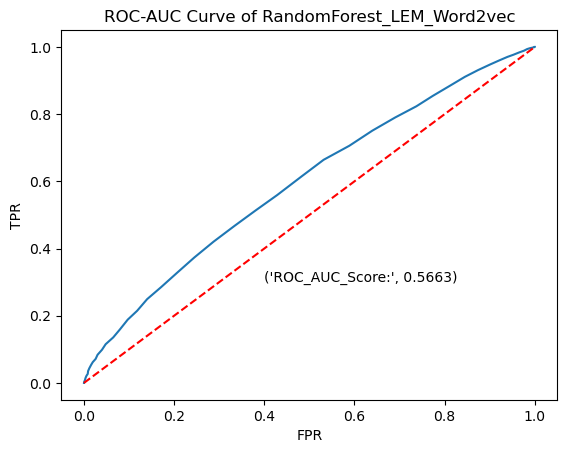

Confusion Matrix for Train


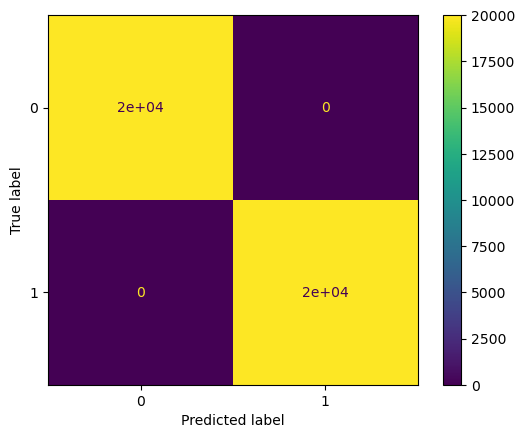

Confusion Matrix for Test


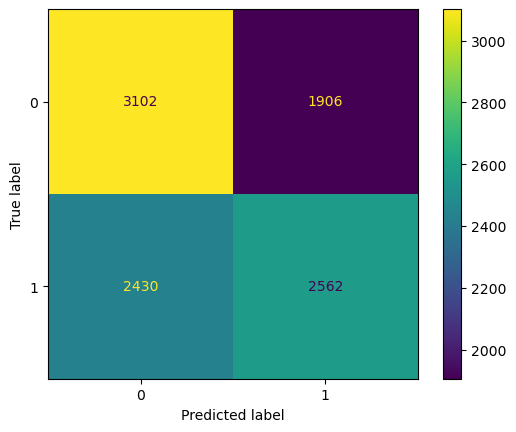

In [173]:
rf = RandomForestClassifier()
model_rf_w = rf.fit(xtrain,ytrain)
model_build(model_rf_w,'RandomForest_LEM_Word2vec')

Train Classifcation Report in  MultinomialNB_LEM_Word2vec 
               precision    recall  f1-score   support

           0       0.52      0.64      0.57     19999
           1       0.53      0.40      0.46     20001

    accuracy                           0.52     40000
   macro avg       0.52      0.52      0.51     40000
weighted avg       0.52      0.52      0.51     40000

***********
Test Classifcation Report in MultinomialNB_LEM_Word2vec  
               precision    recall  f1-score   support

           0       0.51      0.63      0.56      5008
           1       0.52      0.40      0.45      4992

    accuracy                           0.51     10000
   macro avg       0.51      0.51      0.51     10000
weighted avg       0.51      0.51      0.51     10000



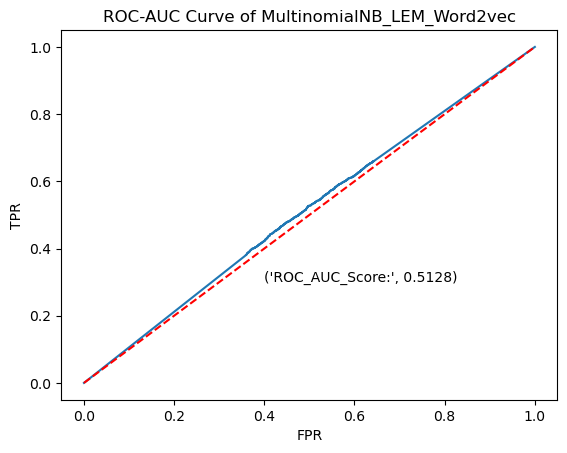

Confusion Matrix for Train


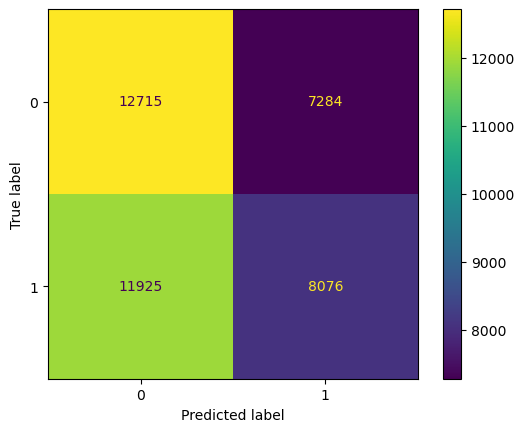

Confusion Matrix for Test


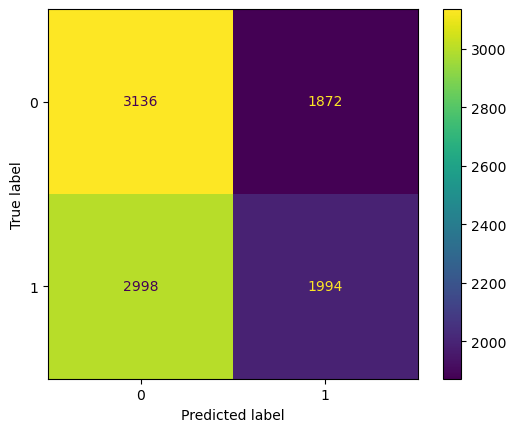

In [174]:
mnb = MultinomialNB()
model_mnb_w = mnb.fit(xtrain, ytrain)
model_build(model_mnb_w,'MultinomialNB_LEM_Word2vec')

Train Classifcation Report in  AdaBoost_LEM_Word2vec 
               precision    recall  f1-score   support

           0       0.58      0.62      0.60     19999
           1       0.59      0.55      0.57     20001

    accuracy                           0.58     40000
   macro avg       0.58      0.58      0.58     40000
weighted avg       0.58      0.58      0.58     40000

***********
Test Classifcation Report in AdaBoost_LEM_Word2vec  
               precision    recall  f1-score   support

           0       0.57      0.61      0.59      5008
           1       0.58      0.54      0.56      4992

    accuracy                           0.58     10000
   macro avg       0.58      0.58      0.58     10000
weighted avg       0.58      0.58      0.58     10000



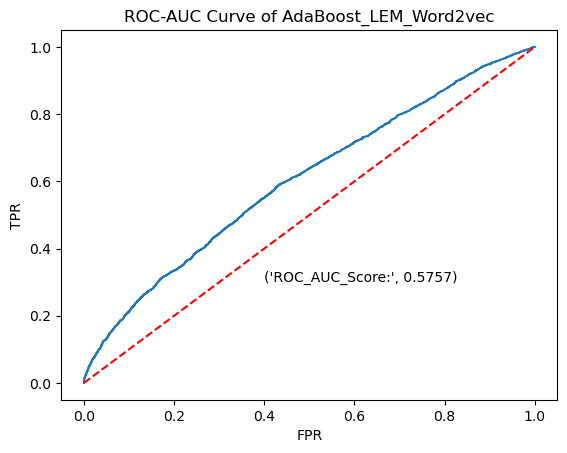

Confusion Matrix for Train


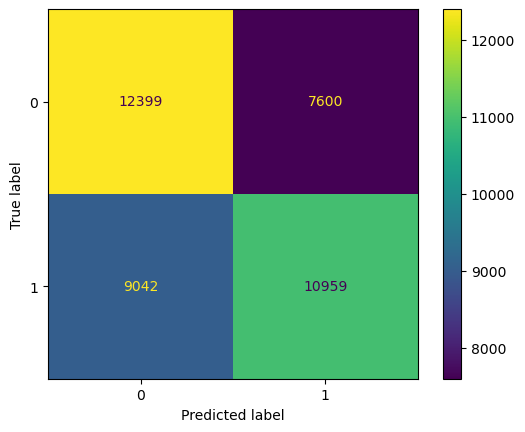

Confusion Matrix for Test


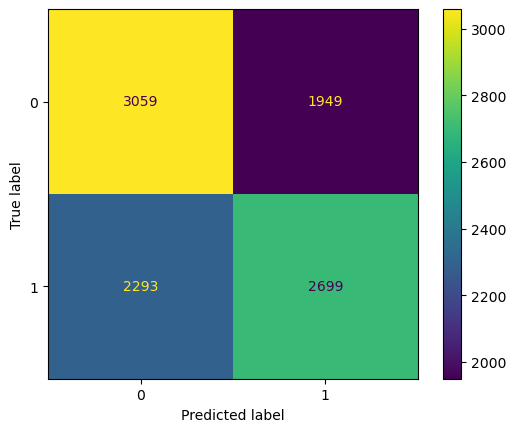

In [175]:
ada = AdaBoostClassifier()
model_ada_w = ada.fit(xtrain,ytrain)
model_build(model_ada_w,'AdaBoost_LEM_Word2vec')

Train Classifcation Report in  GradientBoosting_LEM_Word2vec 
               precision    recall  f1-score   support

           0       0.62      0.72      0.66     19999
           1       0.66      0.56      0.61     20001

    accuracy                           0.64     40000
   macro avg       0.64      0.64      0.64     40000
weighted avg       0.64      0.64      0.64     40000

***********
Test Classifcation Report in GradientBoosting_LEM_Word2vec  
               precision    recall  f1-score   support

           0       0.59      0.68      0.63      5008
           1       0.62      0.53      0.57      4992

    accuracy                           0.60     10000
   macro avg       0.61      0.60      0.60     10000
weighted avg       0.61      0.60      0.60     10000



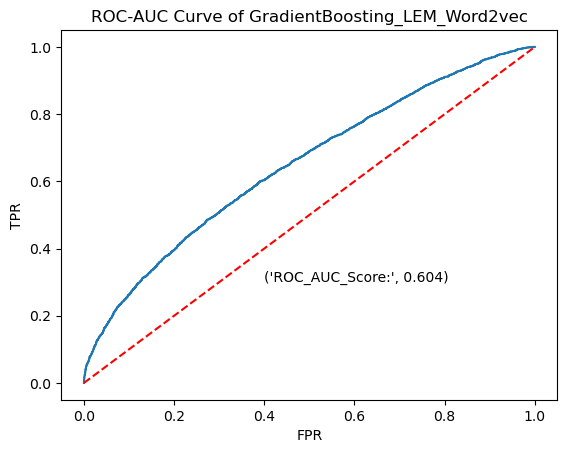

Confusion Matrix for Train


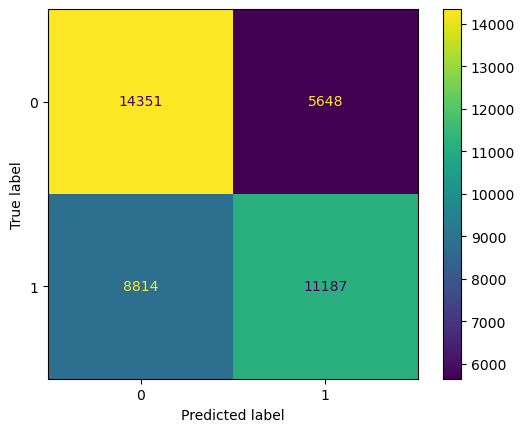

Confusion Matrix for Test


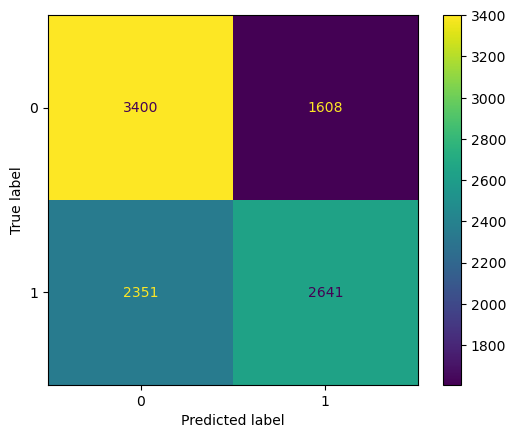

In [176]:
gbc = GradientBoostingClassifier()
model_gbc_w = gbc.fit(xtrain,ytrain)
model_build(model_gbc_w,'GradientBoosting_LEM_Word2vec')

Train Classifcation Report in  XGBClassifier_LEM_Word2vec 
               precision    recall  f1-score   support

           0       0.83      0.89      0.86     19999
           1       0.88      0.82      0.85     20001

    accuracy                           0.85     40000
   macro avg       0.86      0.85      0.85     40000
weighted avg       0.86      0.85      0.85     40000

***********
Test Classifcation Report in XGBClassifier_LEM_Word2vec  
               precision    recall  f1-score   support

           0       0.62      0.66      0.64      5008
           1       0.64      0.60      0.62      4992

    accuracy                           0.63     10000
   macro avg       0.63      0.63      0.63     10000
weighted avg       0.63      0.63      0.63     10000



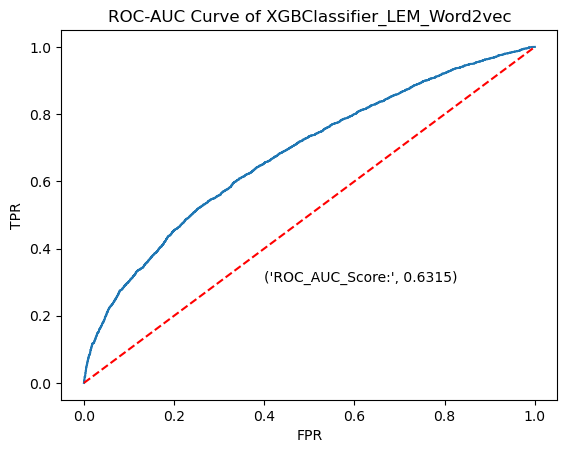

Confusion Matrix for Train


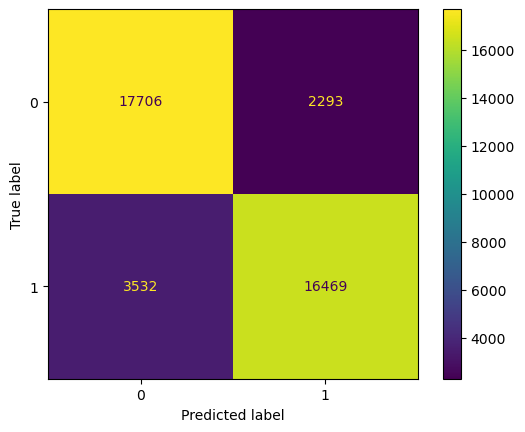

Confusion Matrix for Test


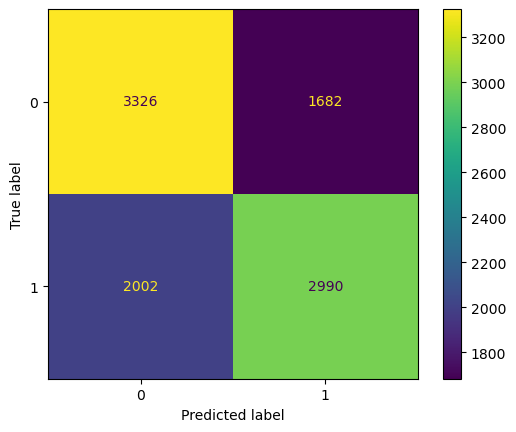

In [177]:
xgb = XGBClassifier()
model_xgb_w = xgb.fit(xtrain,ytrain)
model_build(model_xgb_w,'XGBClassifier_LEM_Word2vec')

In [178]:
# Model Definition
model_rnn_word2vec = Sequential()
model_rnn_word2vec.add(Embedding(vocab_size, embedding_dim, weights=[embedding_matrix], input_length=max_sequence_length, trainable=False))
model_rnn_word2vec.add(SimpleRNN(128))
model_rnn_word2vec.add(Dense(1, activation='sigmoid'))

#Compile the model
model_rnn_word2vec.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model_rnn_word2vec.summary()

# Train the RNN model with Word2Vec embeddings
model_rnn_w=model_rnn_word2vec.fit(xtrain, ytrain, epochs=2, batch_size=16) #validation_data=(xtest, ytest))

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 167, 150)          10530150  
                                                                 
 simple_rnn (SimpleRNN)      (None, 128)               35712     
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 10,565,991
Trainable params: 35,841
Non-trainable params: 10,530,150
_________________________________________________________________
Epoch 1/2
2500/2500 [==============================] - 82s 32ms/step - loss: 0.6984 - accuracy: 0.5021
Epoch 2/2
2500/2500 [==============================] - 80s 32ms/step - loss: 0.6965 - accuracy: 0.4994


313/313 [==============================] - 6s 17ms/step
Train Classifcation Report in  RNN_Word2vec 
               precision    recall  f1-score   support

           0       0.50      1.00      0.67     19999
           1       0.73      0.00      0.00     20001

    accuracy                           0.50     40000
   macro avg       0.62      0.50      0.34     40000
weighted avg       0.62      0.50      0.34     40000

***********
Test Classifcation Report in RNN_Word2vec  
               precision    recall  f1-score   support

           0       0.50      1.00      0.67      5008
           1       0.55      0.00      0.01      4992

    accuracy                           0.50     10000
   macro avg       0.52      0.50      0.34     10000
weighted avg       0.52      0.50      0.34     10000

---
Confusion Matrix for Train


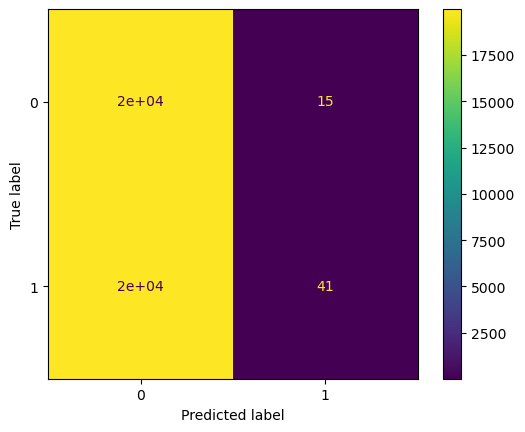

Confusion Matrix for Test


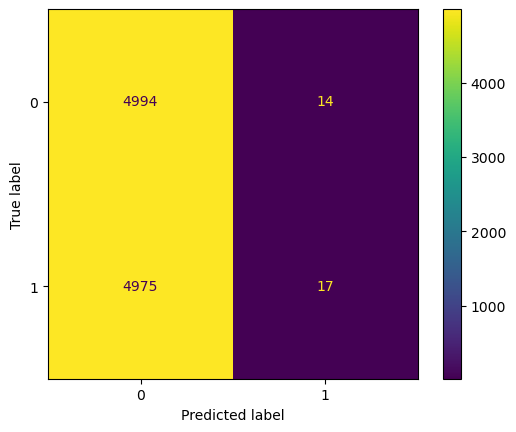

In [179]:
model_build(model_rnn_word2vec,'RNN_Word2vec')

In [180]:
# Model Definition
model_lstm_word2vec = Sequential()
model_lstm_word2vec.add(Embedding(vocab_size, embedding_dim, weights=[embedding_matrix], input_length=max_sequence_length, trainable=False))
model_lstm_word2vec.add(LSTM(128))
model_lstm_word2vec.add(Dense(1, activation='sigmoid'))

# Compile the model.
model_lstm_word2vec.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model_lstm_word2vec.summary()

# Train the LSTM model with Word2Vec embeddings
model_lstm_word2vec.fit(xtrain, ytrain, epochs=1, batch_size=16)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 167, 150)          10530150  
                                                                 
 lstm (LSTM)                 (None, 128)               142848    
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 10,673,127
Trainable params: 142,977
Non-trainable params: 10,530,150
_________________________________________________________________
2500/2500 [==============================] - 276s 110ms/step - loss: 0.6933 - accuracy: 0.5014


313/313 [==============================] - 21s 66ms/step
Train Classifcation Report in  LSTM_Word2vec 
               precision    recall  f1-score   support

           0       0.50      1.00      0.67     19999
           1       0.63      0.01      0.02     20001

    accuracy                           0.50     40000
   macro avg       0.56      0.50      0.34     40000
weighted avg       0.56      0.50      0.34     40000

***********
Test Classifcation Report in LSTM_Word2vec  
               precision    recall  f1-score   support

           0       0.50      0.99      0.67      5008
           1       0.56      0.01      0.02      4992

    accuracy                           0.50     10000
   macro avg       0.53      0.50      0.34     10000
weighted avg       0.53      0.50      0.34     10000

---
Confusion Matrix for Train


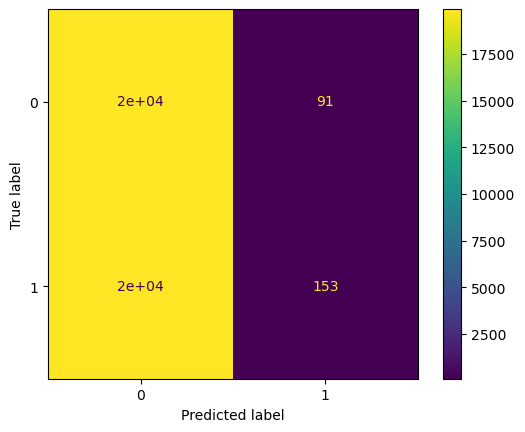

Confusion Matrix for Test


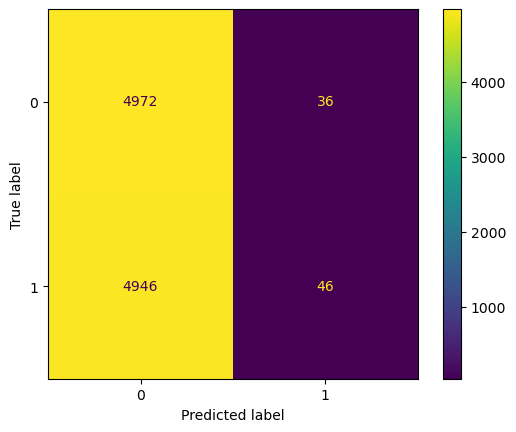

In [181]:
model_build(model_lstm_word2vec,'LSTM_Word2vec')

In [183]:
performance_df

,Model_name,Accurarcy_train,Accuracy_test,Precision_score_train,Precision_score_test,Recall_train,Recall_test,F1score_train,F1Score_test,Remark
0,DecisionTree_LEM_CV,0.999971,0.733800,0.999943,0.727964,1.000000,0.743071,0.999971,0.735440,Over Fit
1,RandomForest_LEM_CV,0.999971,0.833067,0.999943,0.825318,1.000000,0.843219,0.999971,0.834172,Over Fit
2,MultinomialNB_LEM_CV,0.833171,0.833000,0.821600,0.819763,0.851746,0.851921,0.836401,0.835533,Good Fit
3,AdaBoost_LEM_CV,0.798229,0.799267,0.820448,0.819249,0.764266,0.765832,0.791361,0.791641,Under Fit
4,GradientBoosting_LEM_CV,0.798686,0.792667,0.826499,0.819528,0.756791,0.748427,0.790110,0.782365,Under Fit
5,XGBClassifier_LEM_CV,0.889571,0.840733,0.887182,0.838757,0.893004,0.842014,0.890083,0.840382,Over Fit
6,GSV_MNB_LEM_CV,0.833057,0.832933,0.821560,0.819740,0.851518,0.851787,0.836271,0.835456,Good Fit
7,DecisionTree_LEM_TFIDF,0.999943,0.732933,0.999886,0.728521,1.000000,0.739055,0.999943,0.733750,Over Fit
8,RandomForest_LEM_TFIDF,0.999943,0.835000,0.999886,0.824286,1.000000,0.849779,0.999943,0.836838,Over Fit
9,MultinomialNB_LEM_TFIDF,0.834171,0.836000,0.824834,0.825049,0.849121,0.851118,0.836801,0.837881,Good Fit


In [187]:
performance_df.drop(index=[20],inplace=True)

In [151]:
performance_df[performance_df['Remark'] == 'Good Fit'].sort_values(by='Model_name',ascending=True)

,Model_name,Accurarcy_train,Accuracy_test,Precision_score_train,Precision_score_test,Recall_train,Recall_test,F1score_train,F1Score_test,Remark
10,AdaBoost_LEM_TFIDF,0.804571,0.804467,0.813534,0.811538,0.790972,0.791003,0.802095,0.801139,Good Fit
14,GSV_ADA_LEM_TFIDF,0.869543,0.846333,0.867457,0.843169,0.872803,0.849377,0.870122,0.846262,Good Fit
16,GSV_MNB_ADA_LEM_TFIDF,0.834257,0.836533,0.839305,0.840783,0.827380,0.828625,0.833300,0.834659,Good Fit
6,GSV_MNB_LEM_CV,0.833057,0.832933,0.821560,0.819740,0.851518,0.851787,0.836271,0.835456,Good Fit
13,GSV_MNB_LEM_TFIDF,0.834229,0.836067,0.825575,0.825578,0.848094,0.850449,0.836683,0.837829,Good Fit
2,MultinomialNB_LEM_CV,0.833171,0.833000,0.821600,0.819763,0.851746,0.851921,0.836401,0.835533,Good Fit
9,MultinomialNB_LEM_TFIDF,0.834171,0.836000,0.824834,0.825049,0.849121,0.851118,0.836801,0.837881,Good Fit
18,STACK_MNB_ADA_LEM_TFIDF,0.834257,0.836533,0.839305,0.840783,0.827380,0.828625,0.833300,0.834659,Good Fit


In [161]:
performance_df[performance_df['Model_name'].str.endswith('TFIDF')].sort_values('Accurarcy_train', ascending = False)

,Model_name,Accurarcy_train,Accuracy_test,Precision_score_train,Precision_score_test,Recall_train,Recall_test,F1score_train,F1Score_test,Remark
7,DecisionTree_LEM_TFIDF,0.999943,0.732933,0.999886,0.728521,1.000000,0.739055,0.999943,0.733750,Over Fit
8,RandomForest_LEM_TFIDF,0.999943,0.835000,0.999886,0.824286,1.000000,0.849779,0.999943,0.836838,Over Fit
12,XGBClassifier_Lemmatized_TFIDF,0.900314,0.838200,0.900565,0.836672,0.900308,0.838800,0.900437,0.837735,Over Fit
14,GSV_ADA_LEM_TFIDF,0.869543,0.846333,0.867457,0.843169,0.872803,0.849377,0.870122,0.846262,Good Fit
18,STACK_MNB_ADA_LEM_TFIDF,0.834257,0.836533,0.839305,0.840783,0.827380,0.828625,0.833300,0.834659,Good Fit
13,GSV_MNB_LEM_TFIDF,0.834229,0.836067,0.825575,0.825578,0.848094,0.850449,0.836683,0.837829,Good Fit
9,MultinomialNB_LEM_TFIDF,0.834171,0.836000,0.824834,0.825049,0.849121,0.851118,0.836801,0.837881,Good Fit
11,GradientBoosting_LEM_TFIDF,0.804800,0.793267,0.827574,0.815334,0.770714,0.756058,0.798133,0.784578,Under Fit
10,AdaBoost_LEM_TFIDF,0.804571,0.804467,0.813534,0.811538,0.790972,0.791003,0.802095,0.801139,Good Fit
17,STACK_MNB_ADA_LEM_TFIDF,0.520450,0.510200,0.526507,0.512070,0.406680,0.399439,0.458900,0.448796,Under Fit


In [ ]:
performance_df[performance_df['Model_name'].str.endswith('TFIDF')]

In [189]:
performance_df[(performance_df['Model_name'].str.endswith('Word2vec')) & (performance_df['Model_name'].str.startswith('LSTM')) | (performance_df['Model_name'].str.startswith('RNN'))].sort_values('Accurarcy_train', ascending = False)

,Model_name,Accurarcy_train,Accuracy_test,Precision_score_train,Precision_score_test,Recall_train,Recall_test,F1score_train,F1Score_test,Remark
28,LSTM_Word2vec,0.501525,0.5018,0.627049,0.560976,0.00765,0.009215,0.015115,0.018132,Under Fit
27,RNN_Word2vec,0.500625,0.5011,0.732143,0.548387,0.00205,0.003405,0.004088,0.006769,Under Fit


In [153]:
def highlight_row(row):
    if row['Remark'] == 'Good Fit':
        return pd.Series(['background-color: lightgreen']*len(row), index=row.index)
    else:
        return pd.Series(['background-color: white']*len(row), index=row.index)

performance_df.style.apply(highlight_row, axis=1)

,Model_name,Accurarcy_train,Accuracy_test,Precision_score_train,Precision_score_test,Recall_train,Recall_test,F1score_train,F1Score_test,Remark
0,DecisionTree_LEM_CV,0.999971,0.733800,0.999943,0.727964,1.000000,0.743071,0.999971,0.735440,Over Fit
1,RandomForest_LEM_CV,0.999971,0.833067,0.999943,0.825318,1.000000,0.843219,0.999971,0.834172,Over Fit
2,MultinomialNB_LEM_CV,0.833171,0.833000,0.821600,0.819763,0.851746,0.851921,0.836401,0.835533,Good Fit
3,AdaBoost_LEM_CV,0.798229,0.799267,0.820448,0.819249,0.764266,0.765832,0.791361,0.791641,Under Fit
4,GradientBoosting_LEM_CV,0.798686,0.792667,0.826499,0.819528,0.756791,0.748427,0.790110,0.782365,Under Fit
5,XGBClassifier_LEM_CV,0.889571,0.840733,0.887182,0.838757,0.893004,0.842014,0.890083,0.840382,Over Fit
6,GSV_MNB_LEM_CV,0.833057,0.832933,0.821560,0.819740,0.851518,0.851787,0.836271,0.835456,Good Fit
7,DecisionTree_LEM_TFIDF,0.999943,0.732933,0.999886,0.728521,1.000000,0.739055,0.999943,0.733750,Over Fit
8,RandomForest_LEM_TFIDF,0.999943,0.835000,0.999886,0.824286,1.000000,0.849779,0.999943,0.836838,Over Fit
9,MultinomialNB_LEM_TFIDF,0.834171,0.836000,0.824834,0.825049,0.849121,0.851118,0.836801,0.837881,Good Fit


In [80]:
#Inference:

# At first I built the model only with the following classfifcation algorithms like 
# DecisionTreeClassifier, RandomForestClassifier, MultinomialNB,
# AdaBoostClassifier, GradientBoostingClassifier and XGBClassifier
# I used these 6 algorithms with Lemmatized data using 2 dfifferent vectorizer : Count Vectorizer and TF-IDF.
# From the first try top 3 models as MultinomialNB_Lemmatized_CV, MultinomialNB_Lemmatized_TF-IDF, AdaBoostClassifier_Lemmatized_TF-IDF.

# After that I used another vectorizer technique called Word2Vec, Also included Deep learning models such as RNN and LSTM.
# At the final implemetation all the classfication and deep learning algorithms were run using all 3 vectorization technique. 
# And for the top 3 models from that were also same MultinomialNB_Lemmatized_CV, MultinomialNB_Lemmatized_TF-IDF, AdaBoostClassifier_Lemmatized_TF-IDF.

# So applied GridSearchCV for the top 3 models and I got the best model as GSV_ADA_LEM_TFIDF i.e AdaBoostClassifier
# with Lemmatized data using TF-IDF Vectorizer with Train accuary as 0.862371 and Test accuracy as 0.844000.